In [3]:
import apogee.tools.read as apread
from apogee.tools.path import change_dr
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as afits
from scipy.interpolate import interp1d
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
dr = '14'
suffs = {'14':'FE','13':'FE','12':'H'}
def read_convert(dr,data,fname='allStar_chemscrub',**kwargs):
    change_dr(dr)
    data = data(**kwargs)
    suff = suffs[dr]
    if suff == 'FE':
        keys = ['C_{0}'.format(suff),
                'N_{0}'.format(suff),
                'O_{0}'.format(suff),
                'NA_{0}'.format(suff),
                'MG_{0}'.format(suff),
                'AL_{0}'.format(suff),
                'SI_{0}'.format(suff),
                'S_{0}'.format(suff),
                'K_{0}'.format(suff),
                'CA_{0}'.format(suff),
                'TI_{0}'.format(suff),
                'V_{0}'.format(suff),
                'MN_{0}'.format(suff),
                'NI_{0}'.format(suff)]
        newdata = np.zeros((len(data),18))
        newdata[:,0] = data['STARFLAG']
        newdata[:,1] = data['TEFF']
        newdata[:,2] = data['LOGG']
        newdata[:,3] = data['FE_H']
        for k,key in enumerate(keys):
            newdata[:,k+4] = data[key]+data['FE_H']
            newdata[:,k+4][data[key]<-1000] = -9999
            newdata[:,k+4][data['FE_H']<-1000] = -9999
        suff = 'H'
        keys = ['C_{0}'.format(suff),
                'N_{0}'.format(suff),
                'O_{0}'.format(suff),
                'NA_{0}'.format(suff),
                'MG_{0}'.format(suff),
                'AL_{0}'.format(suff),
                'SI_{0}'.format(suff),
                'S_{0}'.format(suff),
                'K_{0}'.format(suff),
                'CA_{0}'.format(suff),
                'TI_{0}'.format(suff),
                'V_{0}'.format(suff),
                'MN_{0}'.format(suff),
                'NI_{0}'.format(suff)]
        formatstr = ', '.join(['f4']*18)
        newdata = np.core.records.fromarrays(newdata.transpose(), 
                                             names='STARFLAG, TEFF, LOGG, FE_H, '+', '.join(keys),
                                             formats = formatstr)
        data=newdata
    good = np.where((data['STARFLAG']==0) & (data['C_{0}'.format(suff)] > -1000) & (data['N_{0}'.format(suff)] > -1000) & (data['O_{0}'.format(suff)] > -1000) & (data['NA_{0}'.format(suff)] > -1000) & (data['MG_{0}'.format(suff)] > -1000) & (data['AL_{0}'.format(suff)] > -1000) & (data['SI_{0}'.format(suff)] > -1000) & (data['S_{0}'.format(suff)] > -1000) & (data['K_{0}'.format(suff)] > -1000) & (data['CA_{0}'.format(suff)] > -1000) & (data['TI_{0}'.format(suff)] > -1000) & (data['V_{0}'.format(suff)] > -1000) & (data['MN_{0}'.format(suff)] > -1000) & (data['FE_H'] > -1000) & (data['NI_{0}'.format(suff)] > -1000) & (data['TEFF'] > -1000) & (data['TEFF']<5000) & (data['LOGG'] > -1000))
    teffcut = np.where((data[good]['TEFF'] > 4700) & (data[good]['TEFF'] < 4900))
    np.save('{0}_dr{1}.npy'.format(fname,dr), data[good])
    np.save('{0}_teffcut_dr{1}.npy'.format(fname,dr), data[good][teffcut])
    return data,good,teffcut

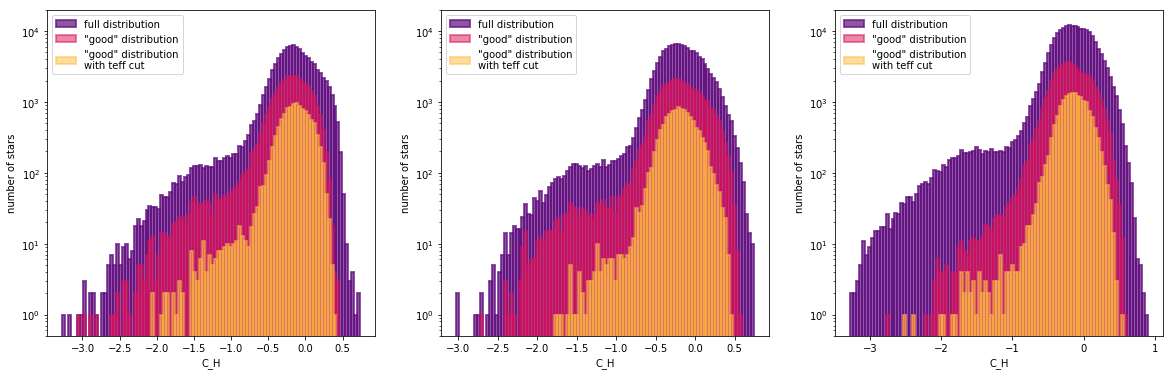

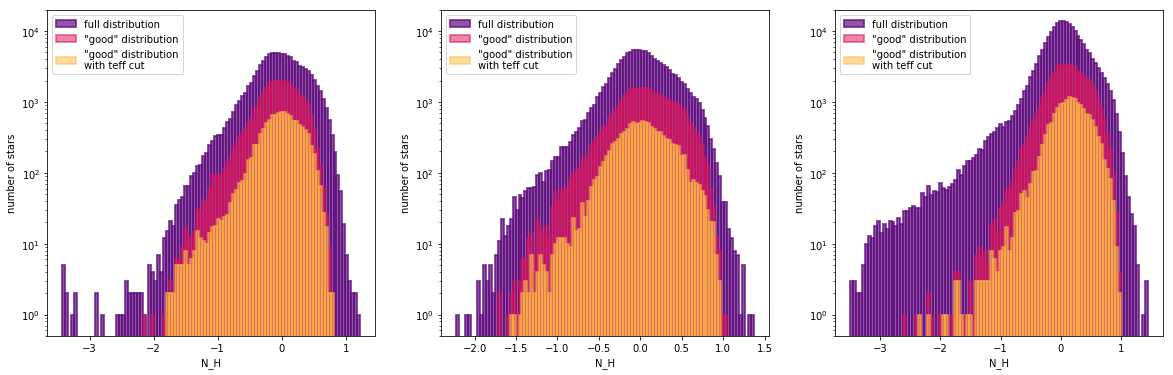

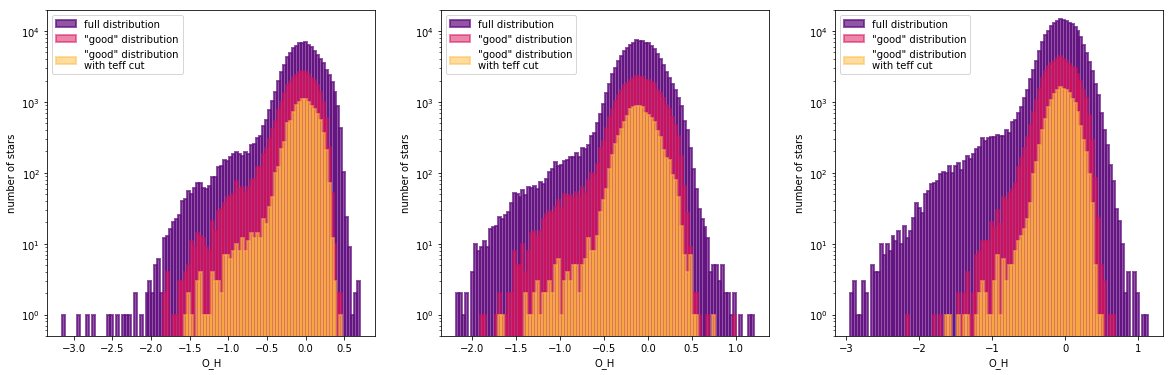

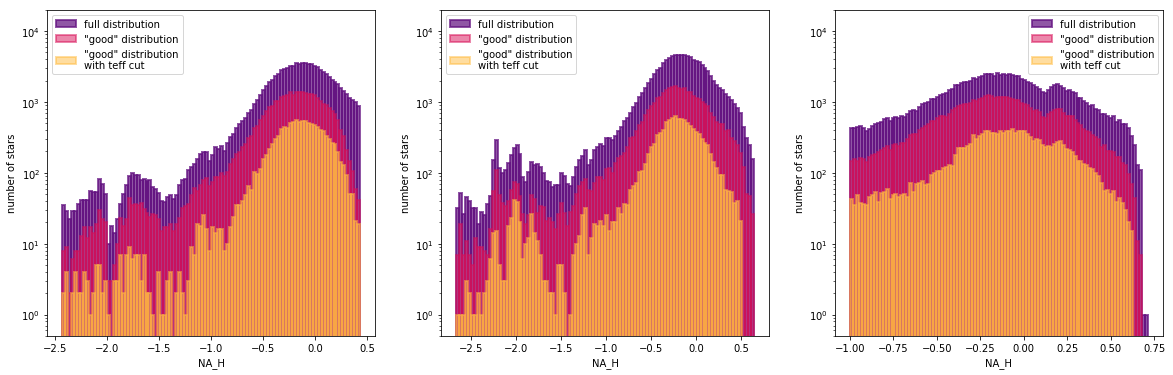

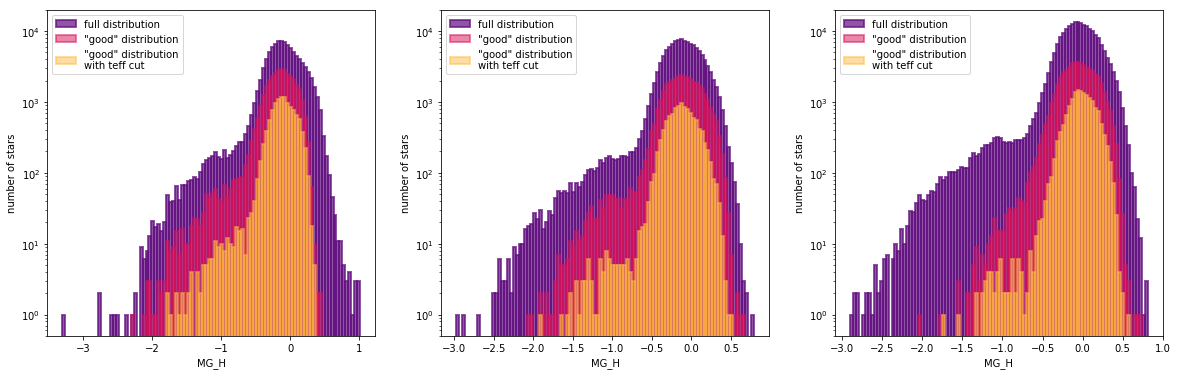

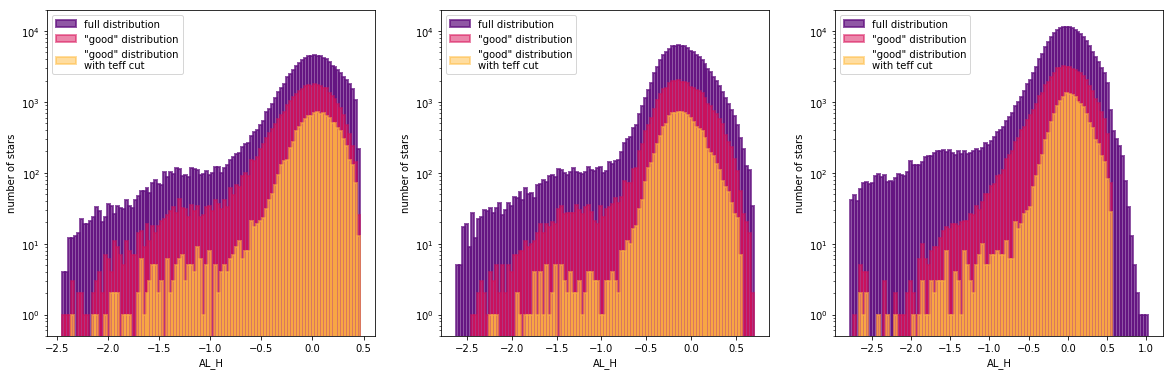

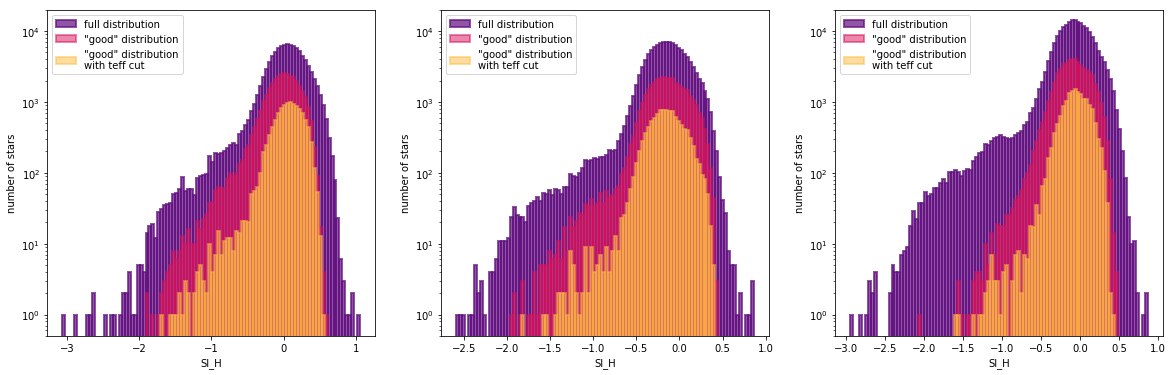

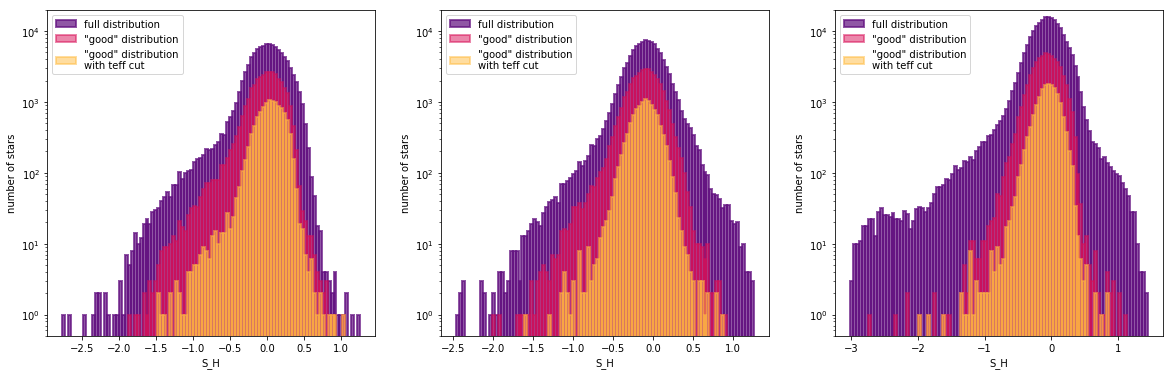

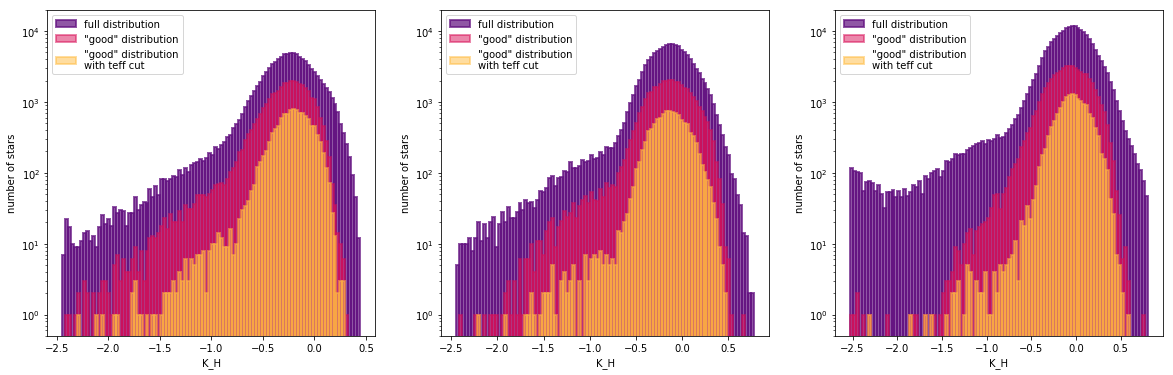

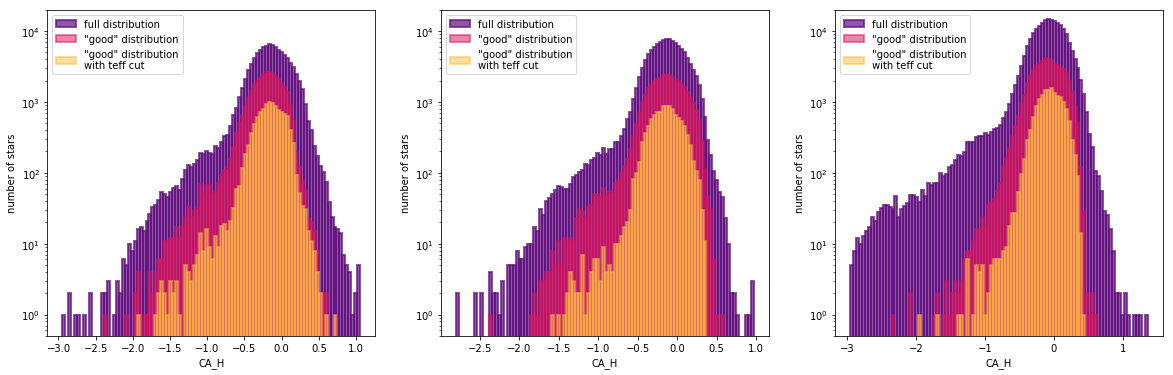

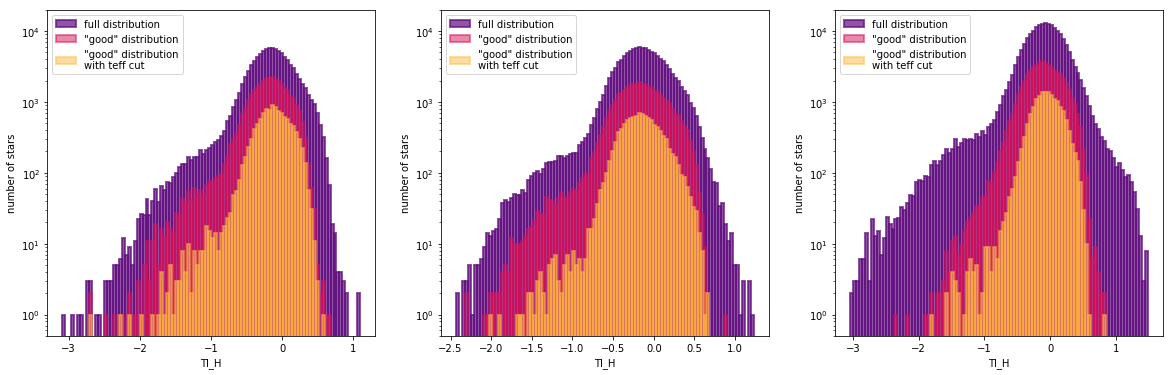

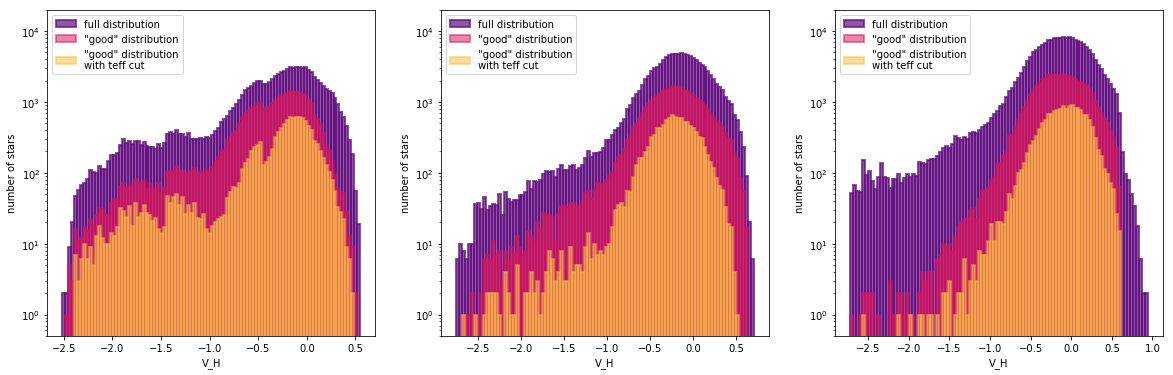

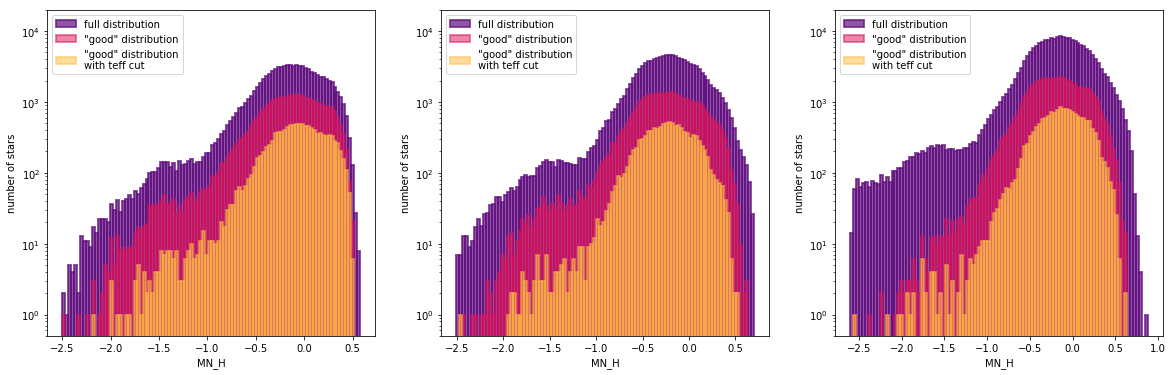

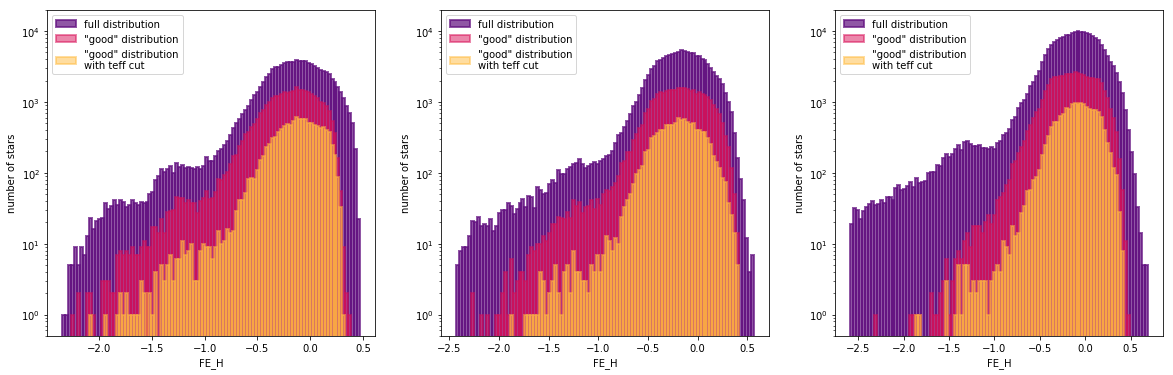

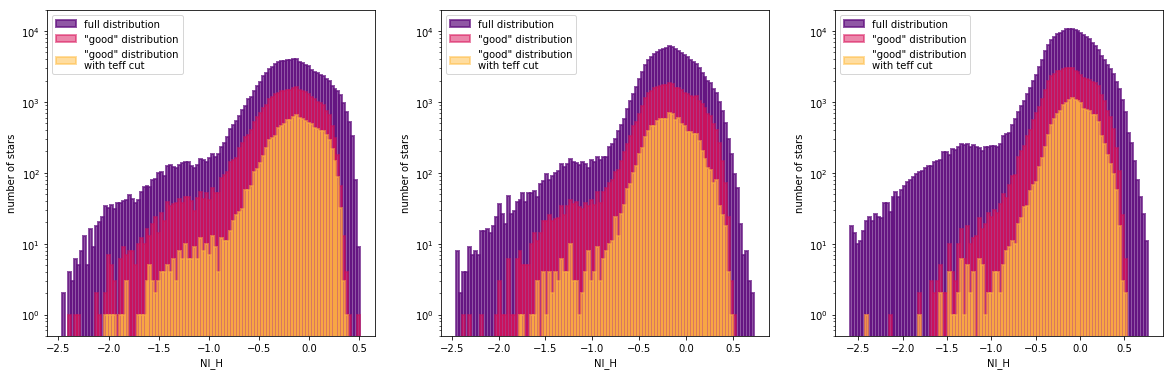

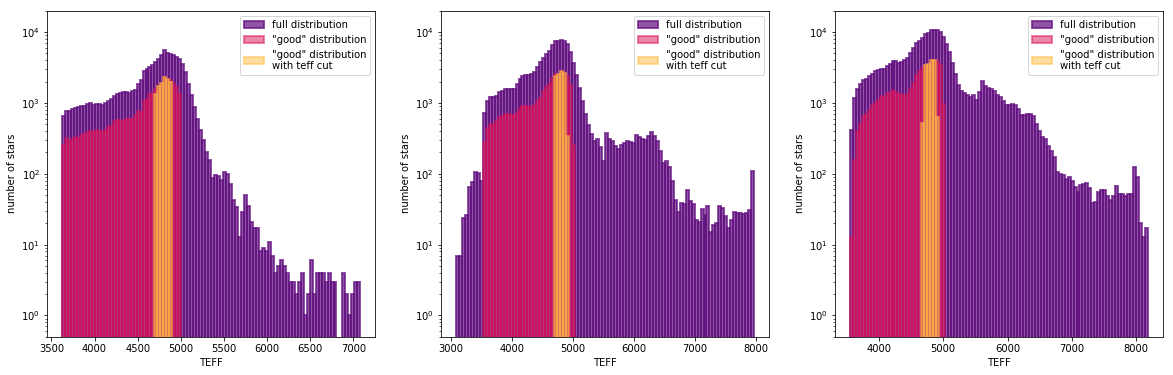

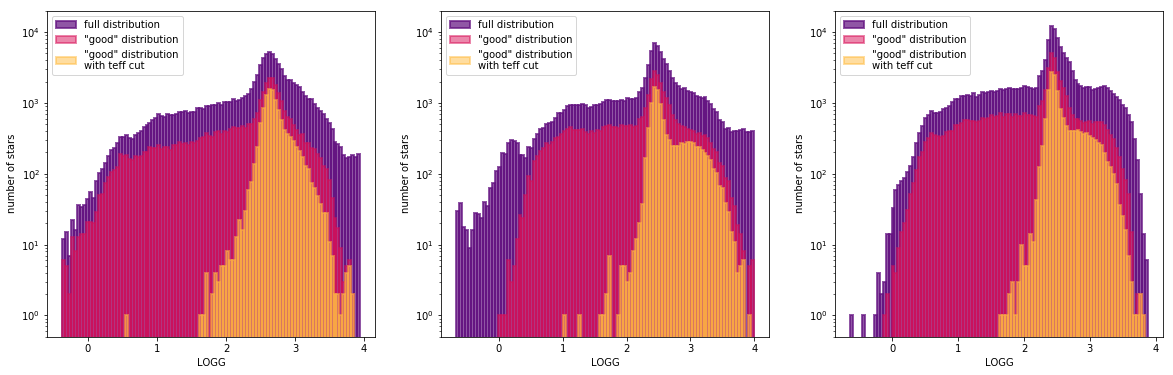

In [5]:
data12,good12,teffcut12 = read_convert('12',apread.allStar,rmdups=True)
data13,good13,teffcut13 = read_convert('13',apread.allStar,rmdups=True)
data14,good14,teffcut14 = read_convert('14',apread.allStar,rmdups=True)
nbins = 100
lw=2
suff = 'H'
keys = ['C_{0}'.format(suff),
        'N_{0}'.format(suff),
        'O_{0}'.format(suff),
        'NA_{0}'.format(suff),
        'MG_{0}'.format(suff),
        'AL_{0}'.format(suff),
        'SI_{0}'.format(suff),
        'S_{0}'.format(suff),
        'K_{0}'.format(suff),
        'CA_{0}'.format(suff),
        'TI_{0}'.format(suff),
        'V_{0}'.format(suff),
        'MN_{0}'.format(suff),
        'FE_H'.format(suff),
        'NI_{0}'.format(suff),
        'TEFF',
        'LOGG']
binlist = [np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(3500,6500,nbins),
           np.linspace(-0.5,4,nbins)]
for k,key in enumerate(keys):
    plt.figure(figsize=(20,6))
    ax = plt.subplot(131)
    ax.set_yscale("log")
    H = plt.hist(data12[data12[key] > -1000][key],bins=nbins,fill=True,label='full distribution',edgecolor='#610F7F',color='#610F7F',linewidth=lw,alpha=0.7)
    bins = H[1]
    plt.hist(data12[good12][key],bins=bins,alpha=0.5,label='"good" distribution',fill=True,edgecolor='#D81159',color='#D81159',linewidth=lw)
    plt.hist(data12[good12][teffcut12][key],bins=bins,alpha=0.5,label='"good" distribution\nwith teff cut',fill=True,edgecolor='#FFBC42',color='#FFBC42',linewidth=lw)
    plt.legend(loc='best')
    plt.xlabel(key)
    plt.ylabel('number of stars')
    plt.ylim(0.5,2e4)
    ax = plt.subplot(132)
    ax.set_yscale("log")
    H = plt.hist(data13[data13[key] > -1000][key],bins=nbins,fill=True,label='full distribution',edgecolor='#610F7F',color='#610F7F',linewidth=lw,alpha=0.7)
    bins = H[1]
    plt.hist(data13[good13][key],bins=bins,alpha=0.5,label='"good" distribution',fill=True,edgecolor='#D81159',color='#D81159',linewidth=lw)
    plt.hist(data13[good13][teffcut13][key],bins=bins,alpha=0.5,label='"good" distribution\nwith teff cut',fill=True,edgecolor='#FFBC42',color='#FFBC42',linewidth=lw)
    plt.legend(loc='best')
    plt.xlabel(key)
    plt.ylabel('number of stars')
    plt.ylim(0.5,2e4)
    ax = plt.subplot(133)
    ax.set_yscale("log")
    H = plt.hist(data14[data14[key] > -1000][key],bins=nbins,fill=True,label='full distribution',edgecolor='#610F7F',color='#610F7F',linewidth=lw,alpha=0.7)
    bins = H[1]
    plt.hist(data14[good14][key],bins=bins,alpha=0.5,label='"good" distribution',fill=True,edgecolor='#D81159',color='#D81159',linewidth=lw)
    plt.hist(data14[good14][teffcut14][key],bins=bins,alpha=0.5,label='"good" distribution\nwith teff cut',fill=True,edgecolor='#FFBC42',color='#FFBC42',linewidth=lw)
    plt.legend(loc='best')
    plt.xlabel(key)
    plt.ylabel('number of stars')
    plt.ylim(0.5,2e4)

## Red Clump

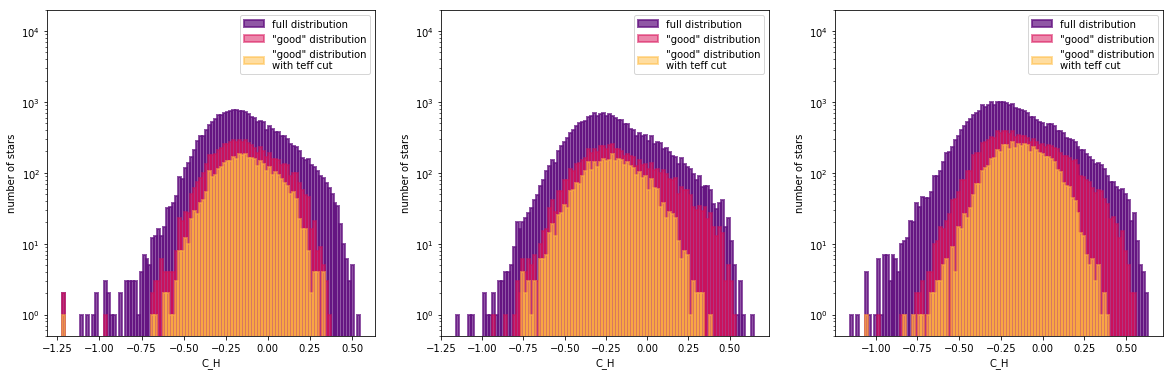

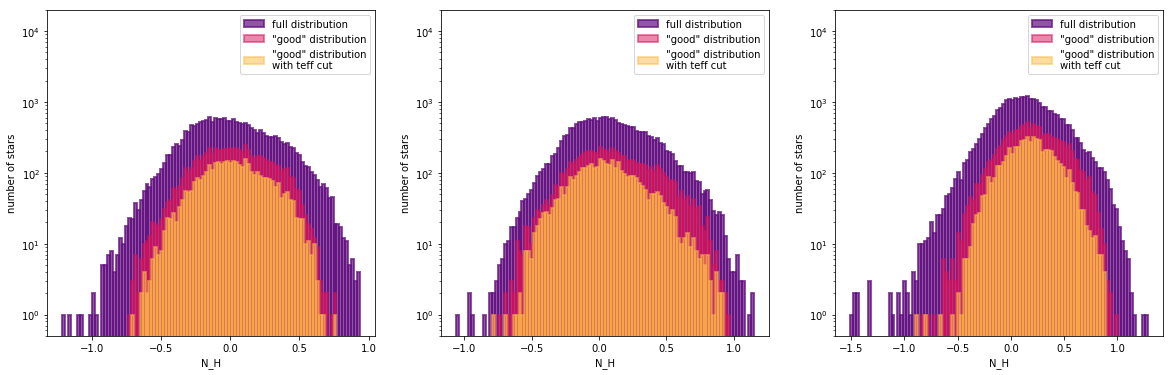

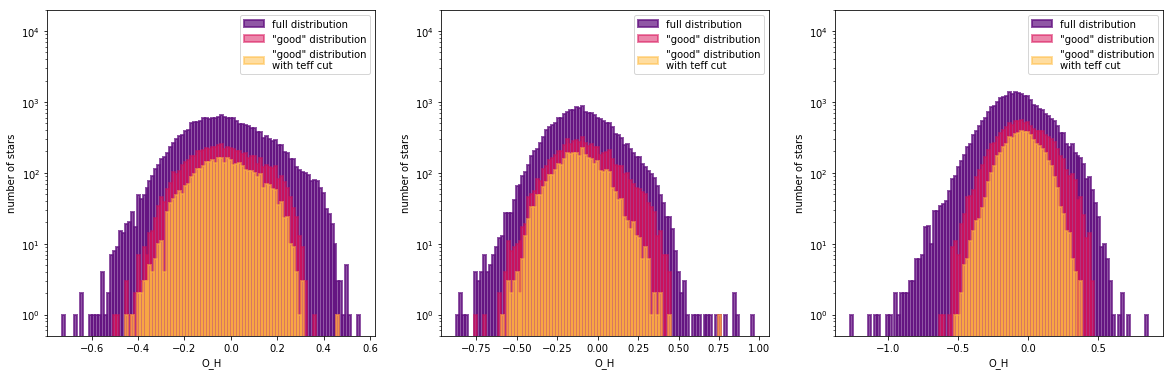

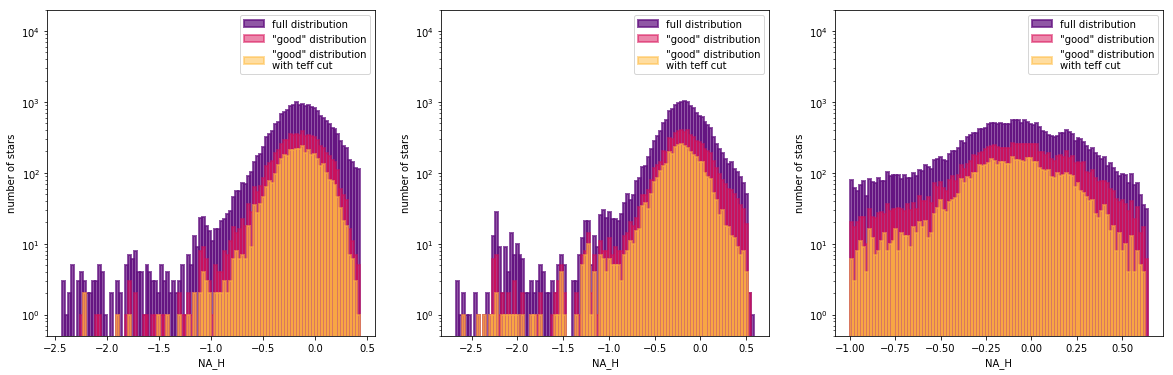

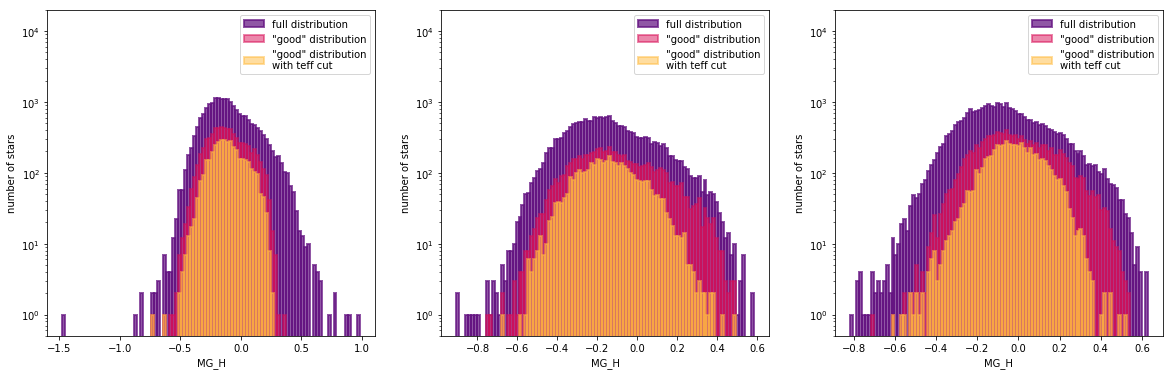

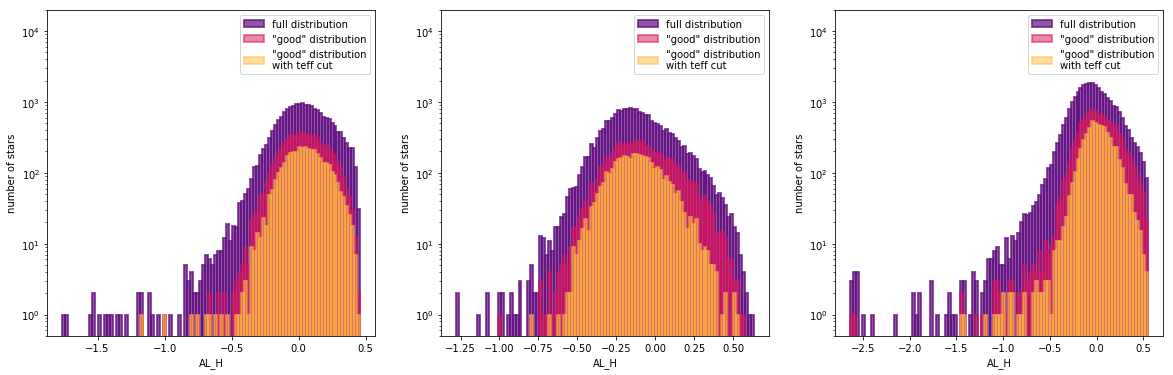

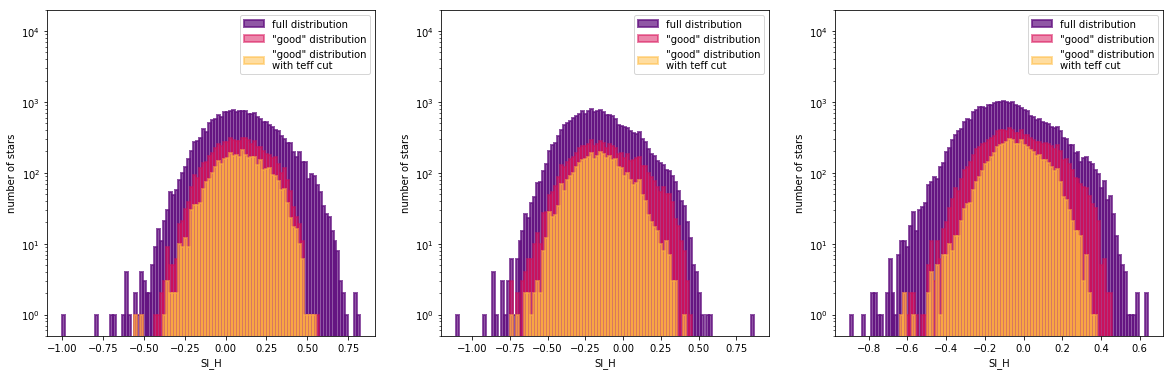

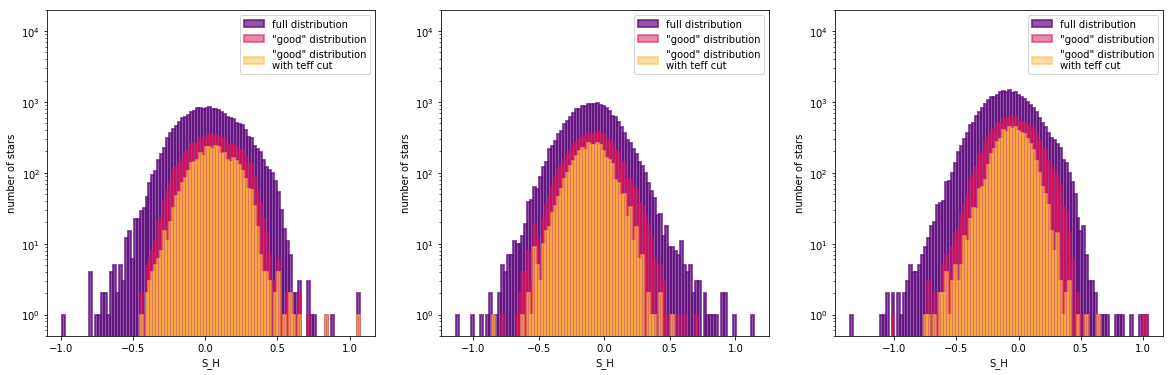

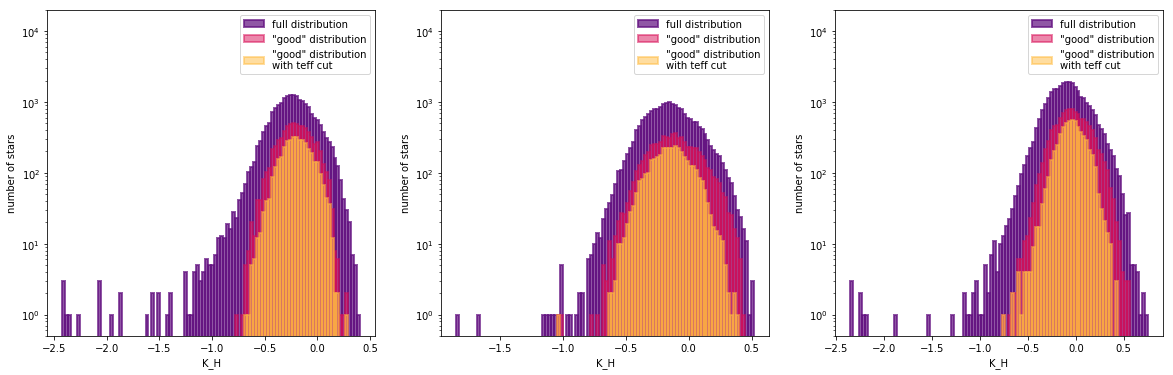

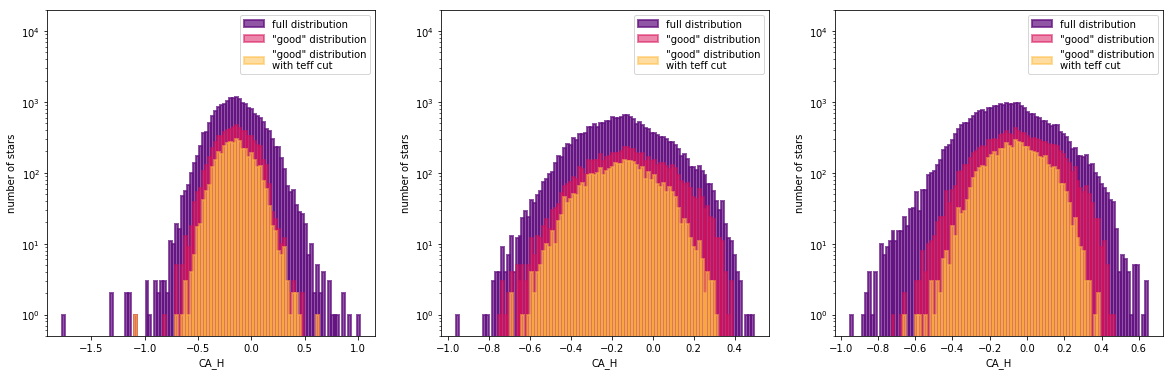

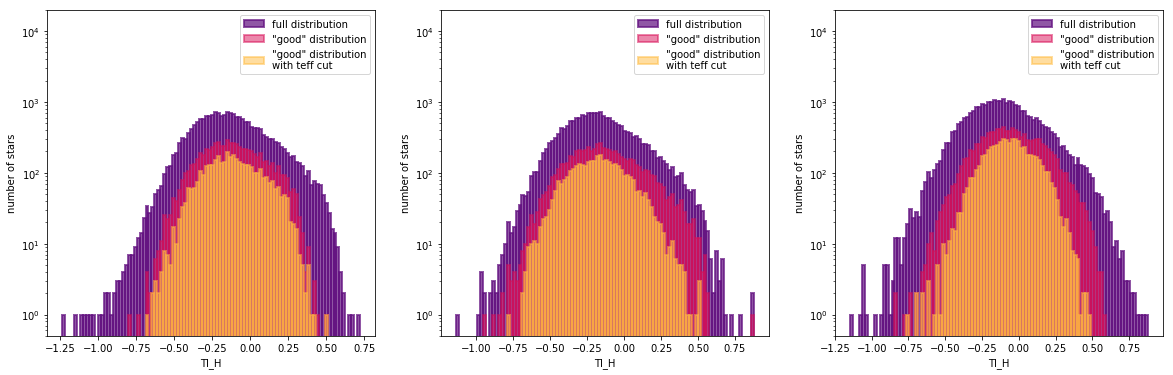

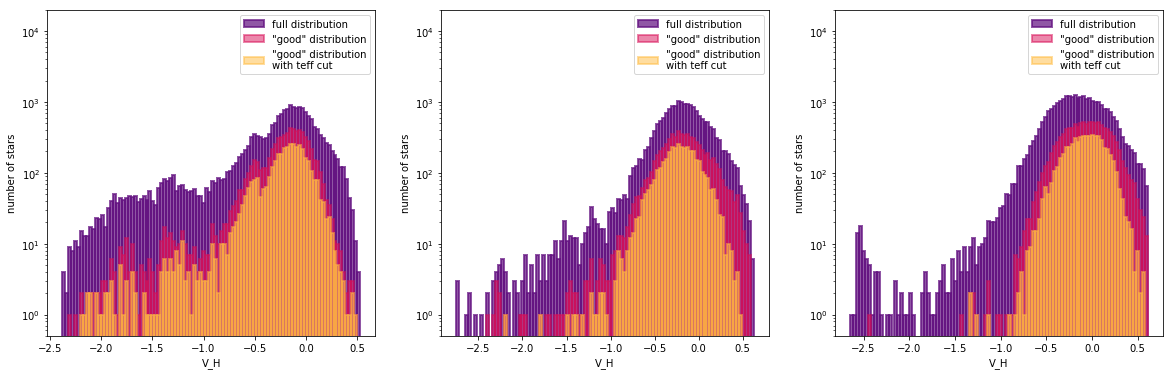

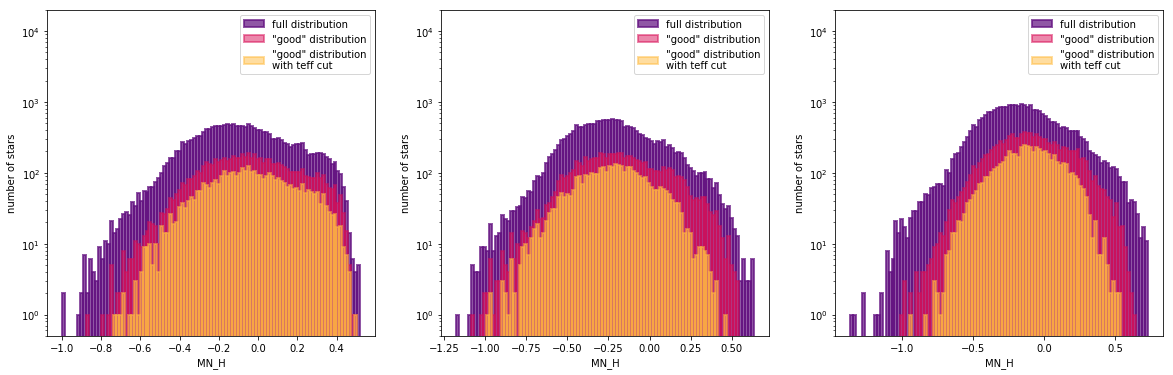

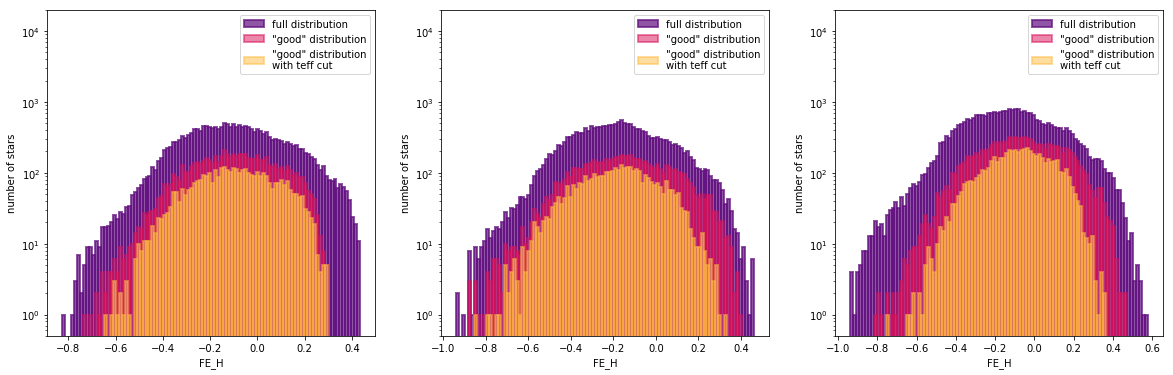

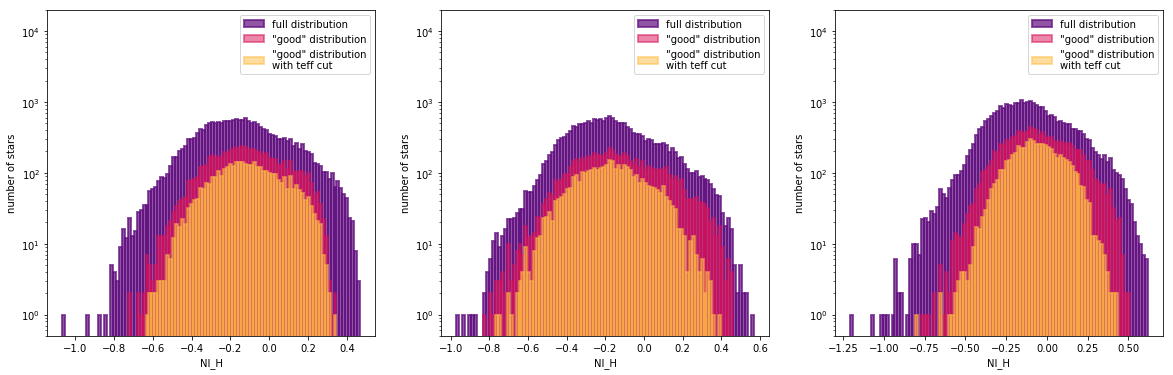

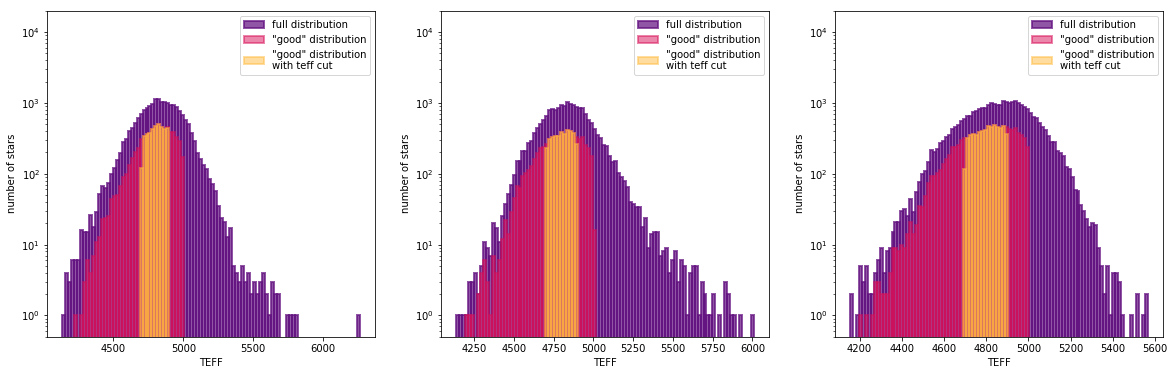

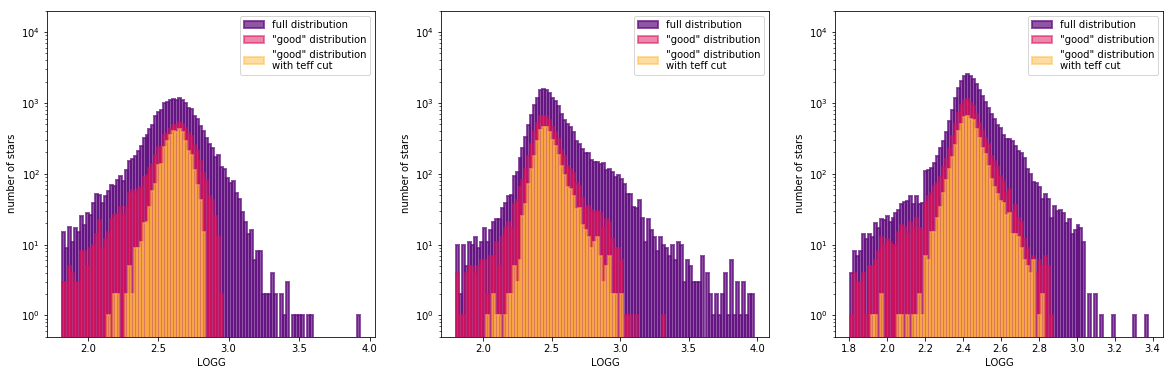

In [12]:
data12,good12,teffcut12 = read_convert('12',apread.rcsample,fname='red_clump')
data13,good13,teffcut13 = read_convert('13',apread.rcsample,fname='red_clump')
data14,good14,teffcut14 = read_convert('14',apread.rcsample,fname='red_clump')
nbins = 100
lw=2
suff = 'H'
keys = ['C_{0}'.format(suff),
        'N_{0}'.format(suff),
        'O_{0}'.format(suff),
        'NA_{0}'.format(suff),
        'MG_{0}'.format(suff),
        'AL_{0}'.format(suff),
        'SI_{0}'.format(suff),
        'S_{0}'.format(suff),
        'K_{0}'.format(suff),
        'CA_{0}'.format(suff),
        'TI_{0}'.format(suff),
        'V_{0}'.format(suff),
        'MN_{0}'.format(suff),
        'FE_H'.format(suff),
        'NI_{0}'.format(suff),
        'TEFF',
        'LOGG']
binlist = [np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(3500,6500,nbins),
           np.linspace(-0.5,4,nbins)]
for k,key in enumerate(keys):
    plt.figure(figsize=(20,6))
    ax = plt.subplot(131)
    ax.set_yscale("log")
    H = plt.hist(data12[data12[key] > -1000][key],bins=nbins,fill=True,label='full distribution',edgecolor='#610F7F',color='#610F7F',linewidth=lw,alpha=0.7)
    bins = H[1]
    plt.hist(data12[good12][key],bins=bins,alpha=0.5,label='"good" distribution',fill=True,edgecolor='#D81159',color='#D81159',linewidth=lw)
    plt.hist(data12[good12][teffcut12][key],bins=bins,alpha=0.5,label='"good" distribution\nwith teff cut',fill=True,edgecolor='#FFBC42',color='#FFBC42',linewidth=lw)
    plt.legend(loc='best')
    plt.xlabel(key)
    plt.ylabel('number of stars')
    plt.ylim(0.5,2e4)
    ax = plt.subplot(132)
    ax.set_yscale("log")
    H = plt.hist(data13[data13[key] > -1000][key],bins=nbins,fill=True,label='full distribution',edgecolor='#610F7F',color='#610F7F',linewidth=lw,alpha=0.7)
    bins = H[1]
    plt.hist(data13[good13][key],bins=bins,alpha=0.5,label='"good" distribution',fill=True,edgecolor='#D81159',color='#D81159',linewidth=lw)
    plt.hist(data13[good13][teffcut13][key],bins=bins,alpha=0.5,label='"good" distribution\nwith teff cut',fill=True,edgecolor='#FFBC42',color='#FFBC42',linewidth=lw)
    plt.legend(loc='best')
    plt.xlabel(key)
    plt.ylabel('number of stars')
    plt.ylim(0.5,2e4)
    ax = plt.subplot(133)
    ax.set_yscale("log")
    H = plt.hist(data14[data14[key] > -1000][key],bins=nbins,fill=True,label='full distribution',edgecolor='#610F7F',color='#610F7F',linewidth=lw,alpha=0.7)
    bins = H[1]
    plt.hist(data14[good14][key],bins=bins,alpha=0.5,label='"good" distribution',fill=True,edgecolor='#D81159',color='#D81159',linewidth=lw)
    plt.hist(data14[good14][teffcut14][key],bins=bins,alpha=0.5,label='"good" distribution\nwith teff cut',fill=True,edgecolor='#FFBC42',color='#FFBC42',linewidth=lw)
    plt.legend(loc='best')
    plt.xlabel(key)
    plt.ylabel('number of stars')
    plt.ylim(0.5,2e4)

## Red Giant

/home/price-jones/local/lib/python3.6/site-packages/isodist-1.-py3.6.egg/isodist/Isochrone.py:228: RuntimeWarning: divide by zero encountered in log10
  return numpy.log10(z)-math.log10(zsolar)



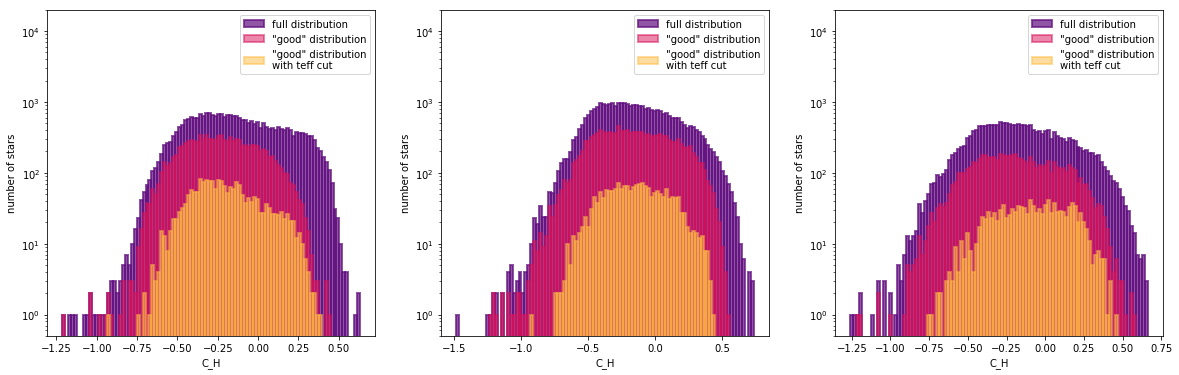

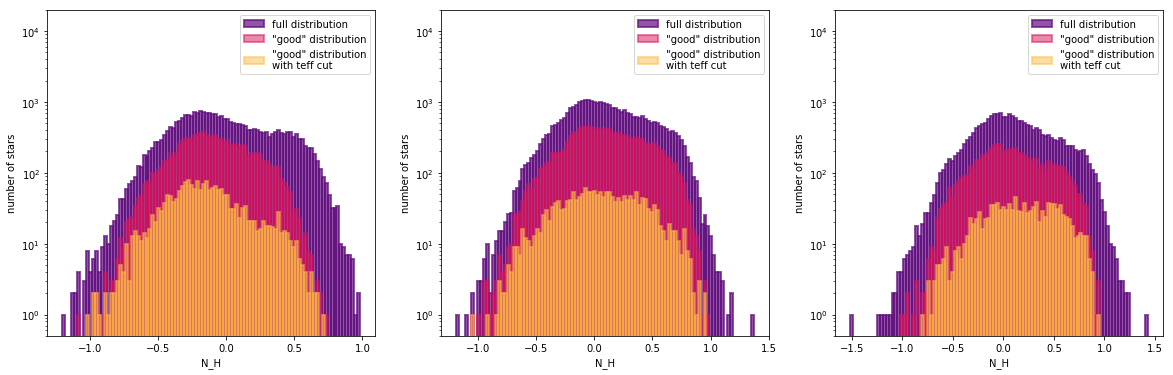

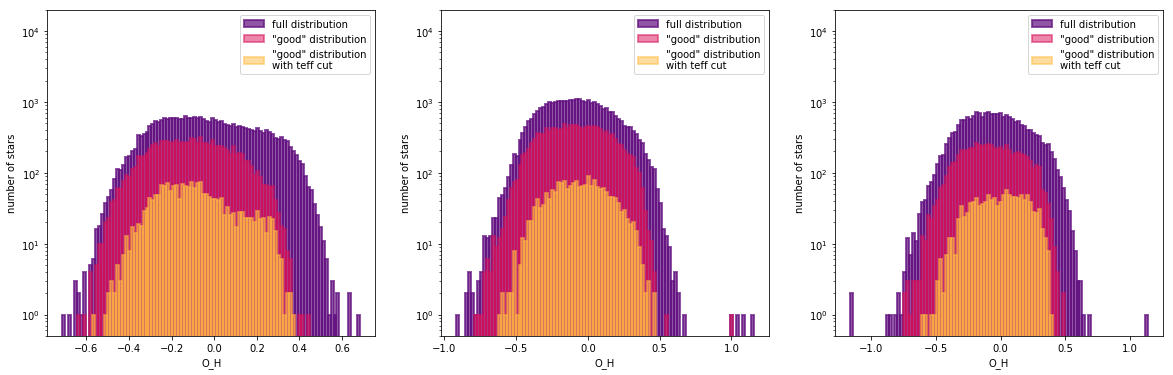

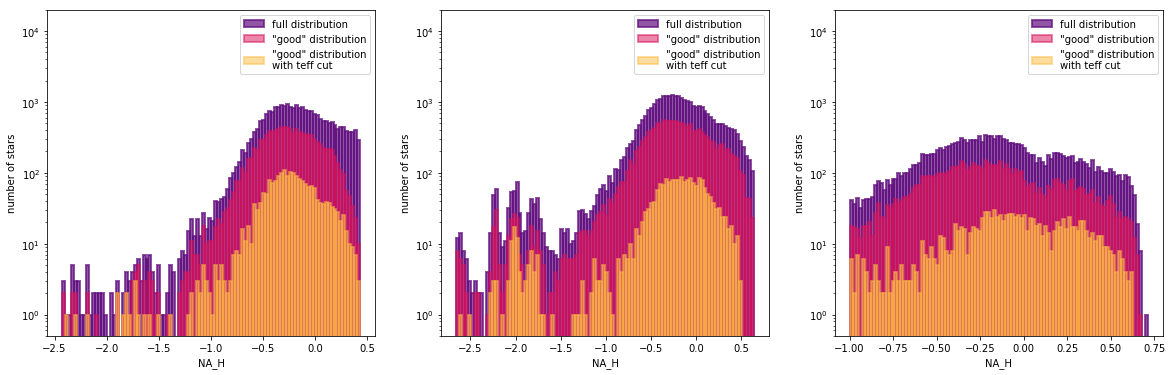

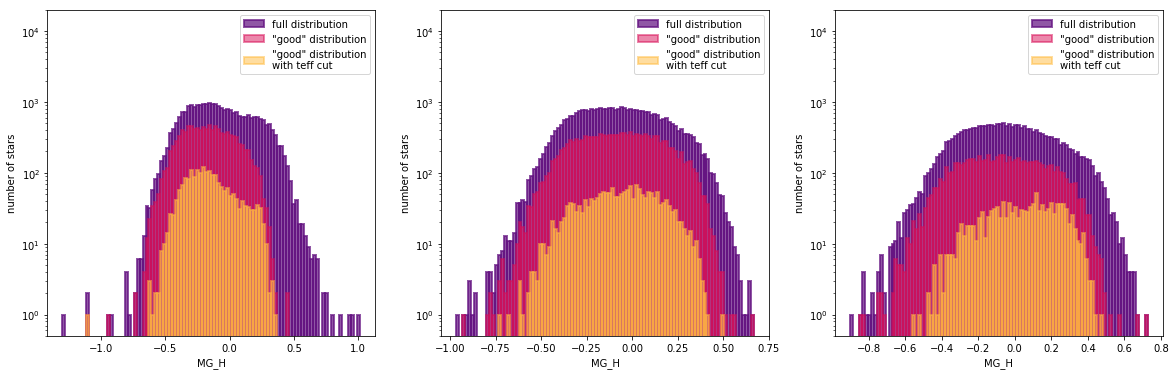

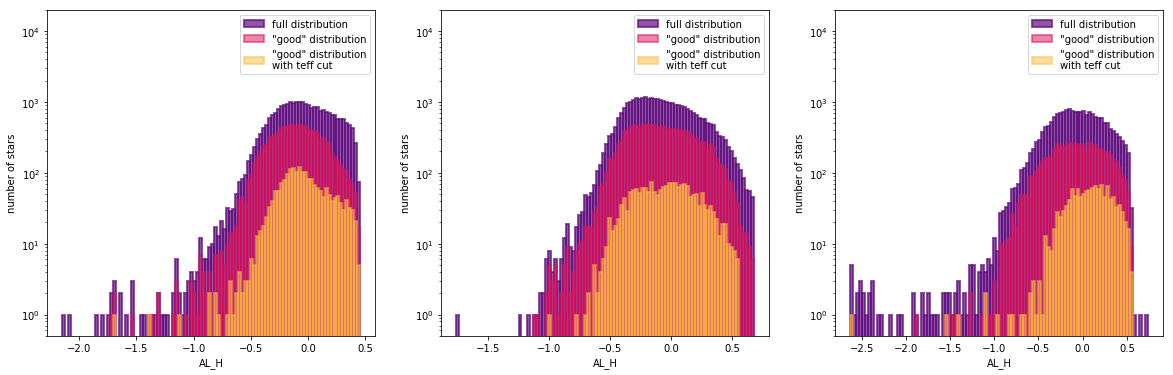

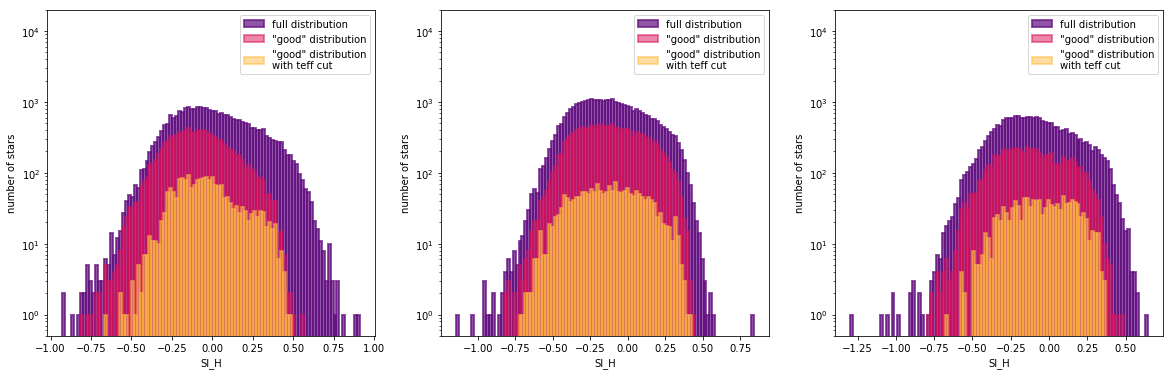

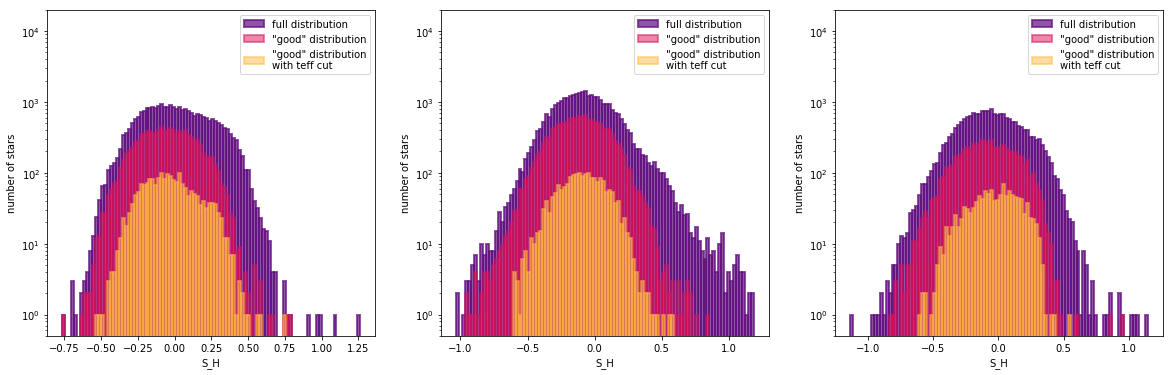

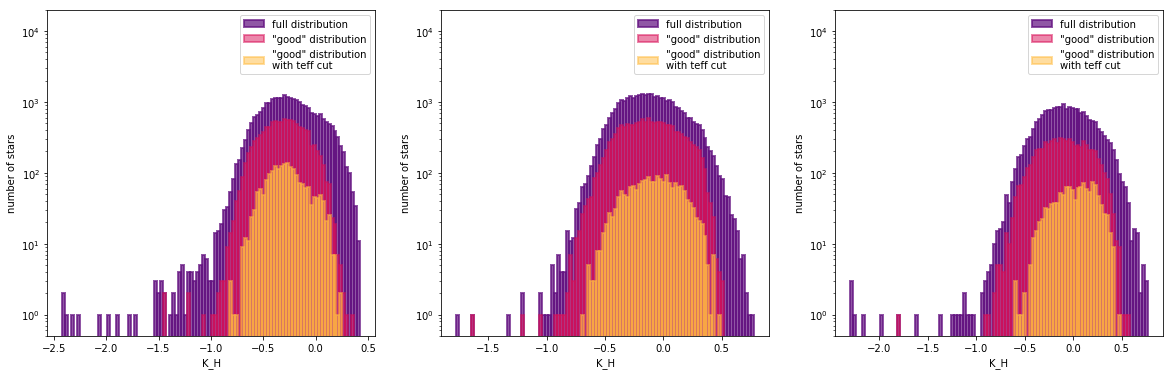

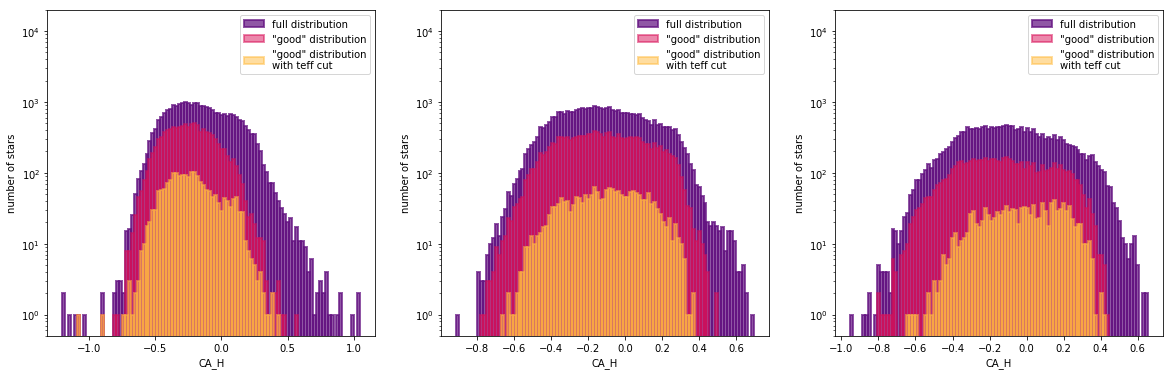

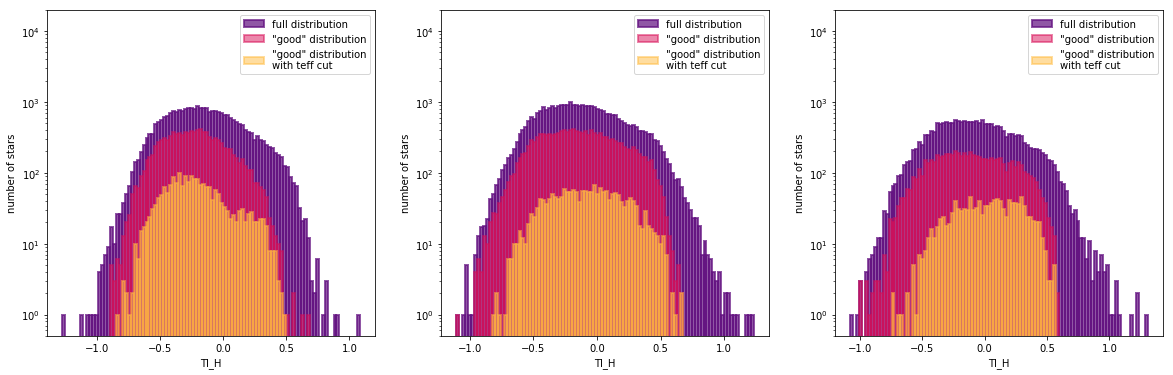

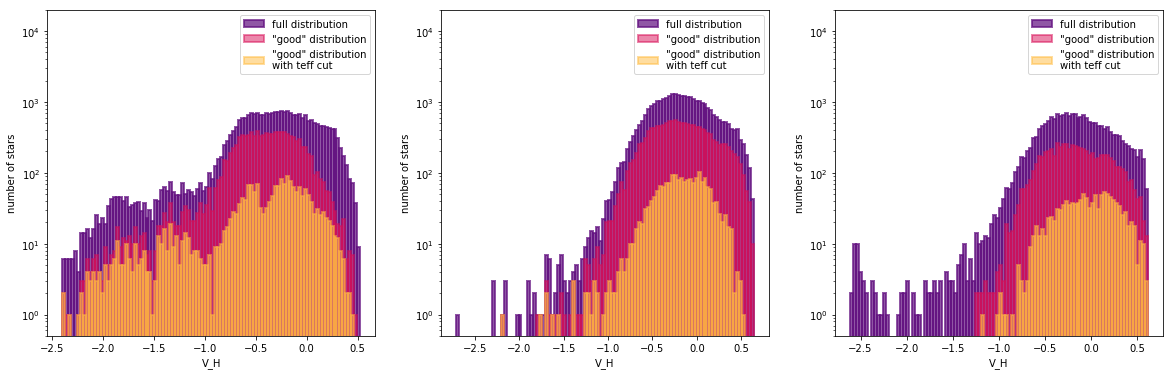

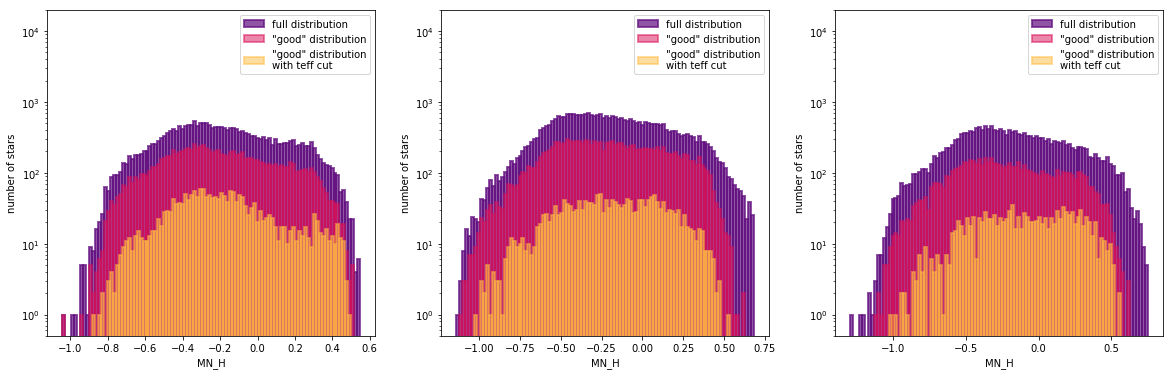

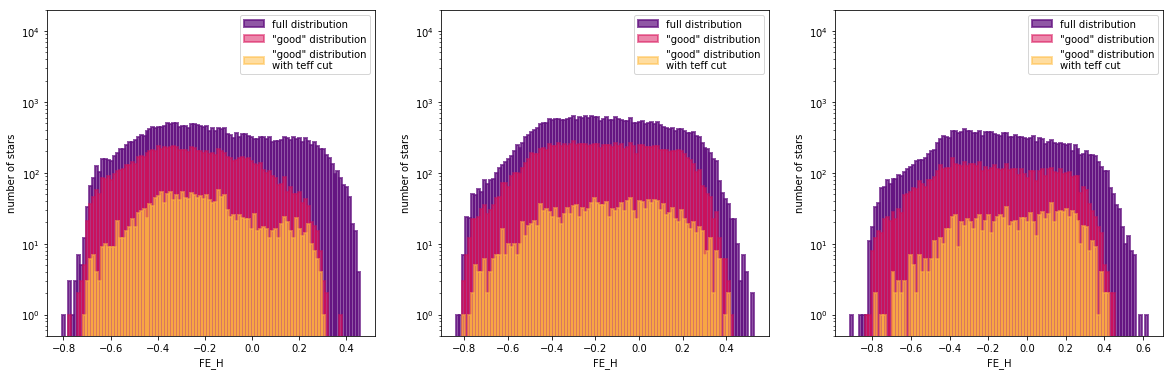

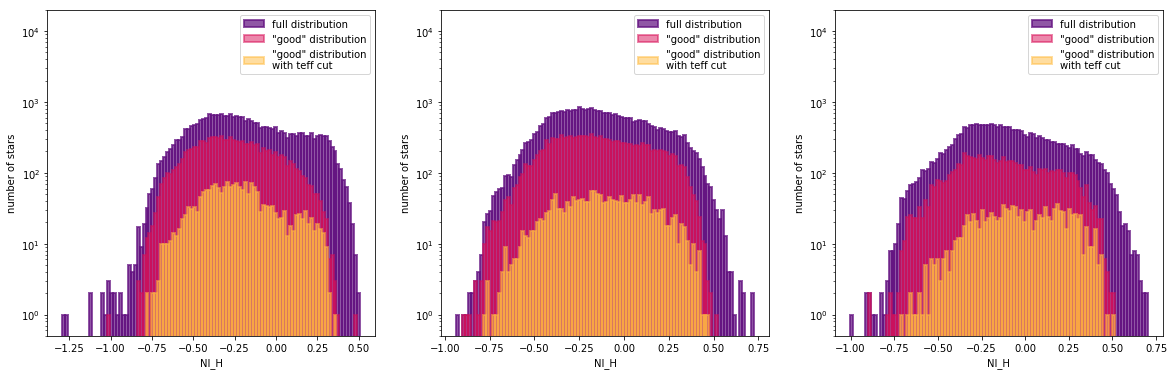

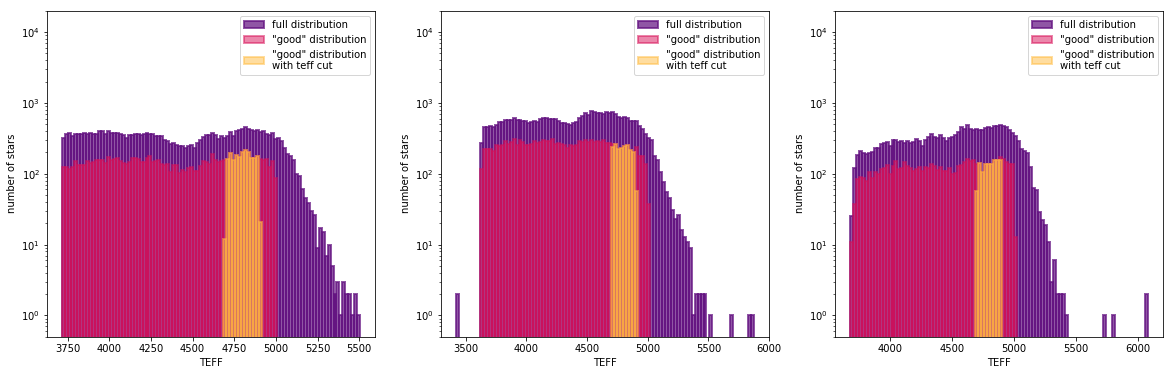

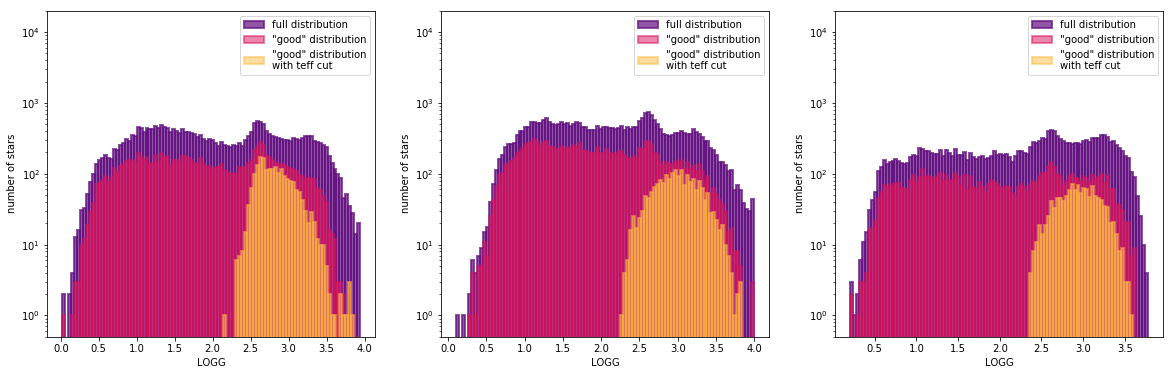

In [15]:
import isodist
import apogee.samples.rc as rcmodel

def rgsample():
    """
    Selects red giants from APOGEE sample
    """
    data= apread.allStar(main=True,exclude_star_bad=True,exclude_star_warn=True)
    jk= data['J0']-data['K0']
    z= isodist.FEH2Z(data['METALS'],zsolar=0.017)
    z[z > 0.024]= 0.024
    logg= data['LOGG']
    indx= ((jk >= 0.8)
            +(logg > rcmodel.loggteffcut(data['TEFF'],z,upper=True)))
    rgindx=indx*(data['METALS'] > -.8)
    return data[rgindx]

data12,good12,teffcut12 = read_convert('12',rgsample,fname='red_giant')
data13,good13,teffcut13 = read_convert('13',rgsample,fname='red_giant')
data14,good14,teffcut14 = read_convert('14',rgsample,fname='red_giant')
nbins = 100
lw=2
suff = 'H'
keys = ['C_{0}'.format(suff),
        'N_{0}'.format(suff),
        'O_{0}'.format(suff),
        'NA_{0}'.format(suff),
        'MG_{0}'.format(suff),
        'AL_{0}'.format(suff),
        'SI_{0}'.format(suff),
        'S_{0}'.format(suff),
        'K_{0}'.format(suff),
        'CA_{0}'.format(suff),
        'TI_{0}'.format(suff),
        'V_{0}'.format(suff),
        'MN_{0}'.format(suff),
        'FE_H'.format(suff),
        'NI_{0}'.format(suff),
        'TEFF',
        'LOGG']
binlist = [np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(-3,1.0,nbins),
           np.linspace(3500,6500,nbins),
           np.linspace(-0.5,4,nbins)]
for k,key in enumerate(keys):
    plt.figure(figsize=(20,6))
    ax = plt.subplot(131)
    ax.set_yscale("log")
    H = plt.hist(data12[data12[key] > -1000][key],bins=nbins,fill=True,label='full distribution',edgecolor='#610F7F',color='#610F7F',linewidth=lw,alpha=0.7)
    bins = H[1]
    plt.hist(data12[good12][key],bins=bins,alpha=0.5,label='"good" distribution',fill=True,edgecolor='#D81159',color='#D81159',linewidth=lw)
    plt.hist(data12[good12][teffcut12][key],bins=bins,alpha=0.5,label='"good" distribution\nwith teff cut',fill=True,edgecolor='#FFBC42',color='#FFBC42',linewidth=lw)
    plt.legend(loc='best')
    plt.xlabel(key)
    plt.ylabel('number of stars')
    plt.ylim(0.5,2e4)
    ax = plt.subplot(132)
    ax.set_yscale("log")
    H = plt.hist(data13[data13[key] > -1000][key],bins=nbins,fill=True,label='full distribution',edgecolor='#610F7F',color='#610F7F',linewidth=lw,alpha=0.7)
    bins = H[1]
    plt.hist(data13[good13][key],bins=bins,alpha=0.5,label='"good" distribution',fill=True,edgecolor='#D81159',color='#D81159',linewidth=lw)
    plt.hist(data13[good13][teffcut13][key],bins=bins,alpha=0.5,label='"good" distribution\nwith teff cut',fill=True,edgecolor='#FFBC42',color='#FFBC42',linewidth=lw)
    plt.legend(loc='best')
    plt.xlabel(key)
    plt.ylabel('number of stars')
    plt.ylim(0.5,2e4)
    ax = plt.subplot(133)
    ax.set_yscale("log")
    H = plt.hist(data14[data14[key] > -1000][key],bins=nbins,fill=True,label='full distribution',edgecolor='#610F7F',color='#610F7F',linewidth=lw,alpha=0.7)
    bins = H[1]
    plt.hist(data14[good14][key],bins=bins,alpha=0.5,label='"good" distribution',fill=True,edgecolor='#D81159',color='#D81159',linewidth=lw)
    plt.hist(data14[good14][teffcut14][key],bins=bins,alpha=0.5,label='"good" distribution\nwith teff cut',fill=True,edgecolor='#FFBC42',color='#FFBC42',linewidth=lw)
    plt.legend(loc='best')
    plt.xlabel(key)
    plt.ylabel('number of stars')
    plt.ylim(0.5,2e4)

## GALAH

In [2]:
galah_cat = afits.open('../galah/GALAH_DR2.fits')
galah_cat=galah_cat[1].data

In [3]:
galah_cat.dtype

dtype((numpy.record, [('star_id', 'S16'), ('sobject_id', '>i8'), ('gaia_dr2_id', '>i8'), ('ndfclass', 'S12'), ('field_id', '>i8'), ('raj2000', '>f8'), ('dej2000', '>f8'), ('jmag', '>f8'), ('hmag', '>f8'), ('kmag', '>f8'), ('vmag_jk', '>f8'), ('e_jmag', '>f8'), ('e_hmag', '>f8'), ('e_kmag', '>f8'), ('snr_c1', '>f8'), ('snr_c2', '>f8'), ('snr_c3', '>f8'), ('snr_c4', '>f8'), ('rv_synt', '>f8'), ('e_rv_synt', '>f8'), ('rv_obst', '>f8'), ('e_rv_obst', '>f8'), ('rv_nogr_obst', '>f8'), ('e_rv_nogr_obst', '>f8'), ('chi2_cannon', '>f8'), ('sp_label_distance', '>f8'), ('flag_cannon', '>i8'), ('teff', '>f8'), ('e_teff', '>f8'), ('logg', '>f8'), ('e_logg', '>f8'), ('fe_h', '>f8'), ('e_fe_h', '>f8'), ('vmic', '>f8'), ('e_vmic', '>f8'), ('vsini', '>f8'), ('e_vsini', '>f8'), ('alpha_fe', '>f8'), ('e_alpha_fe', '>f8'), ('li_fe', '>f8'), ('e_li_fe', '>f8'), ('flag_li_fe', '>i8'), ('c_fe', '>f8'), ('e_c_fe', '>f8'), ('flag_c_fe', '>i8'), ('o_fe', '>f8'), ('e_o_fe', '>f8'), ('flag_o_fe', '>i8'), ('na_fe'

(array([ 29126.,  25710.,  13894.,   4292.,  34191., 186859.,    410.,
         45311.,   2889.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 9 Patch objects>)

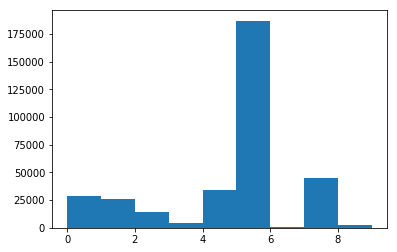

In [19]:
plt.hist(galah_cat['flag_c_fe'],bins = len(np.unique(galah_cat['flag_c_fe'])) )

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


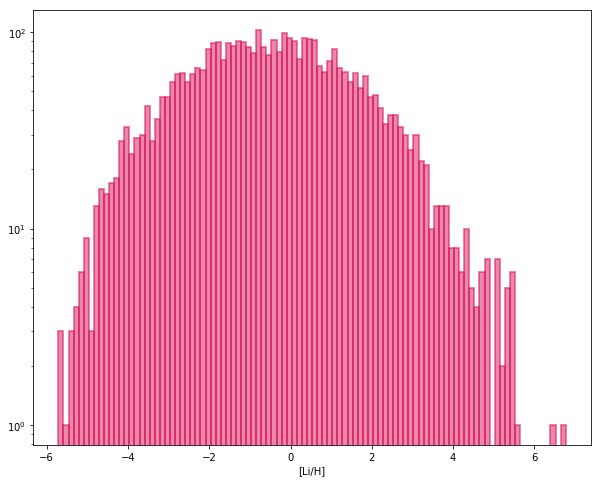

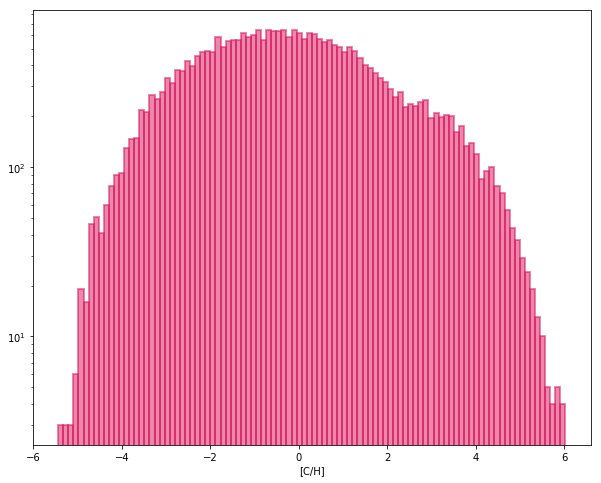

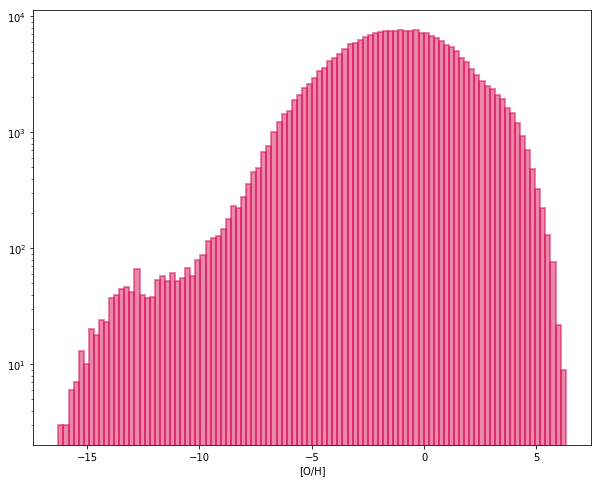

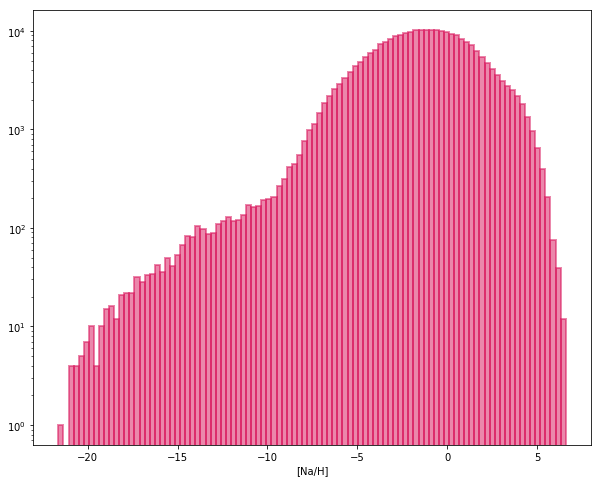

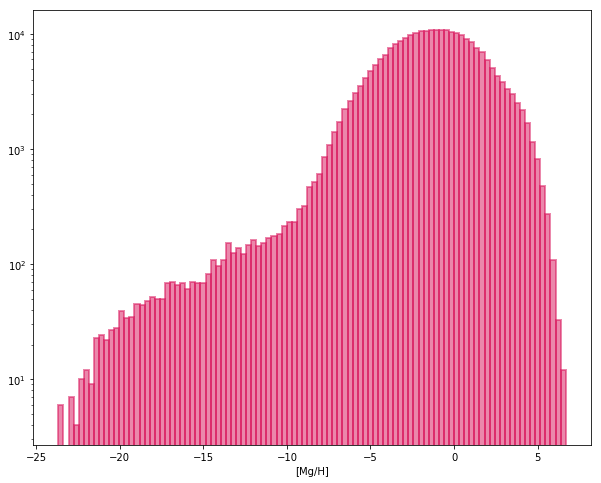

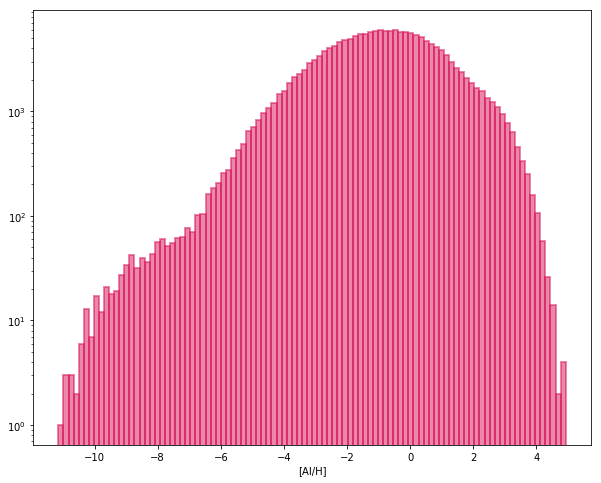

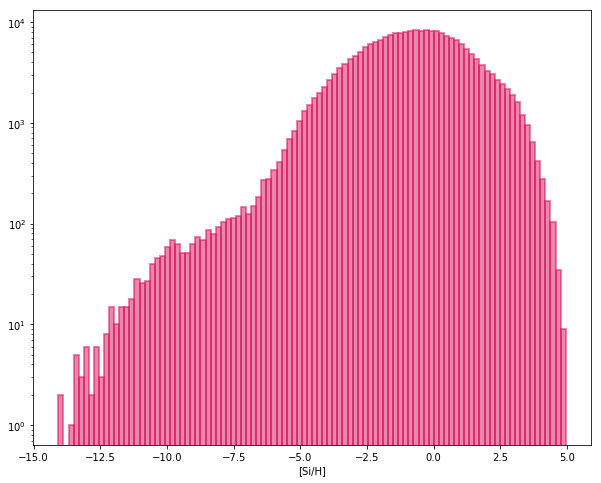

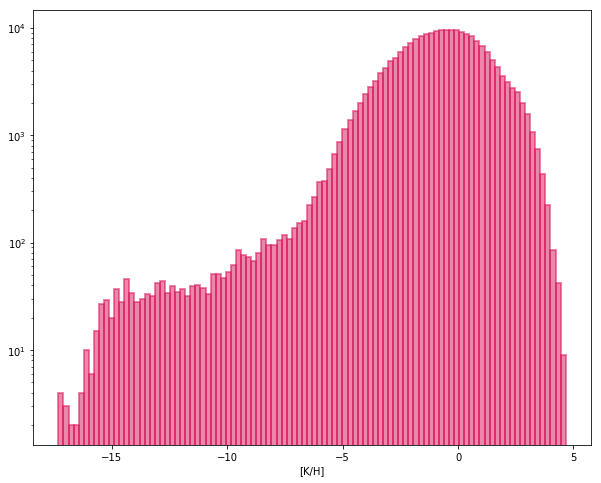

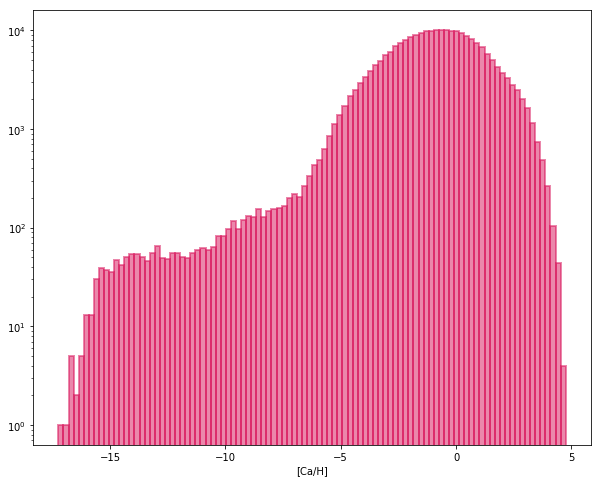

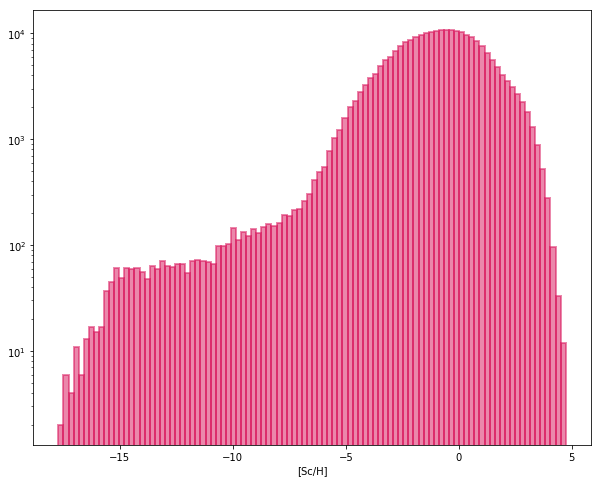

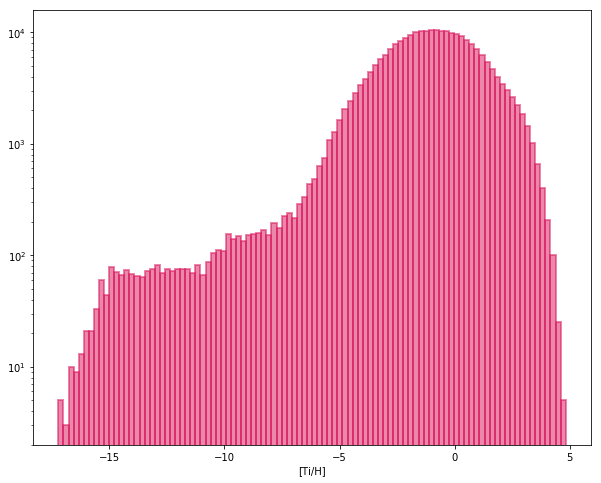

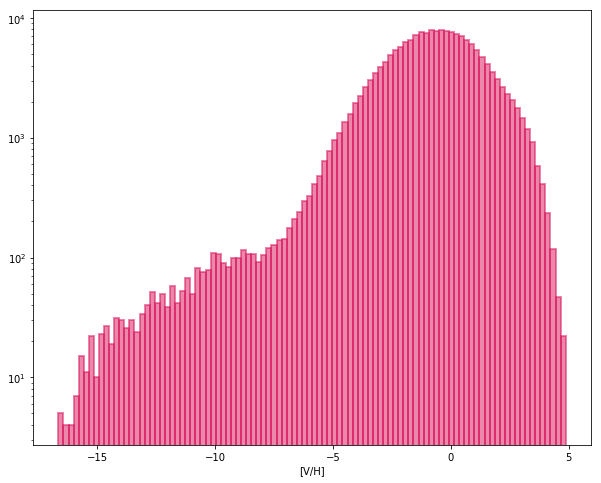

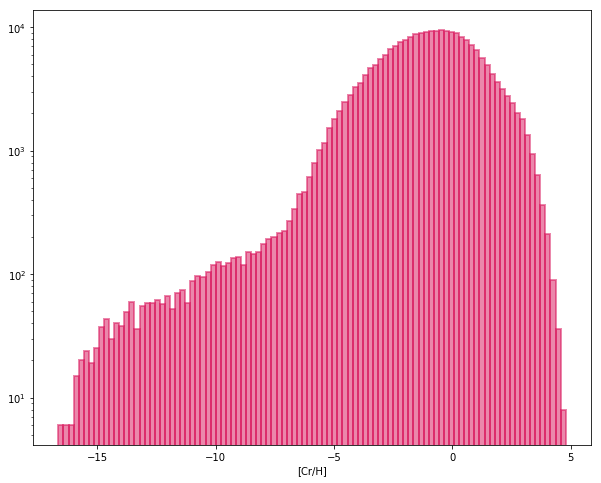

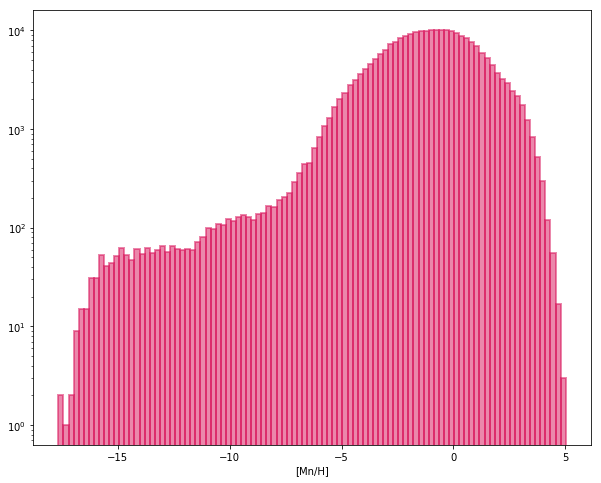

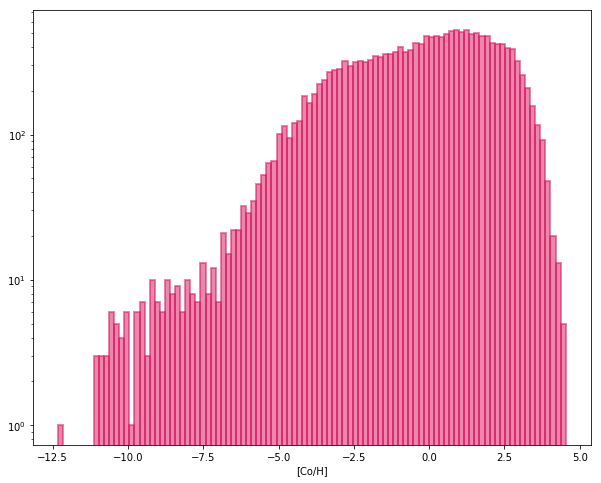

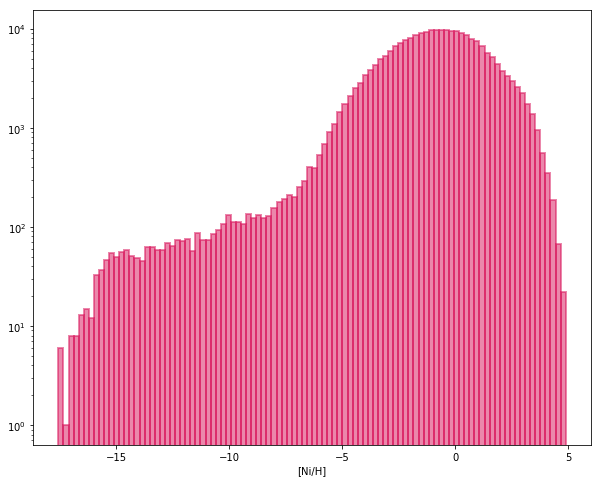

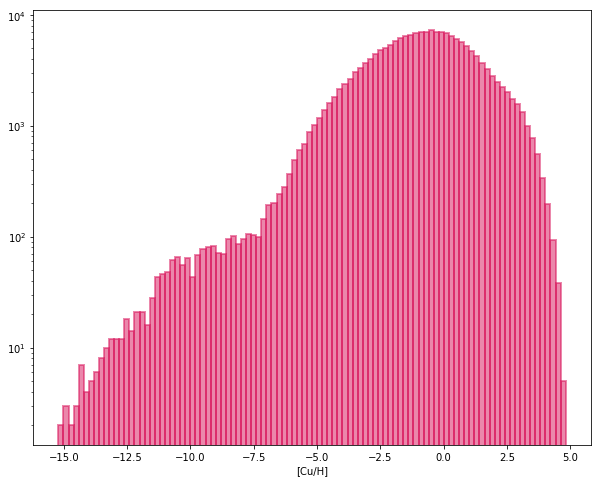

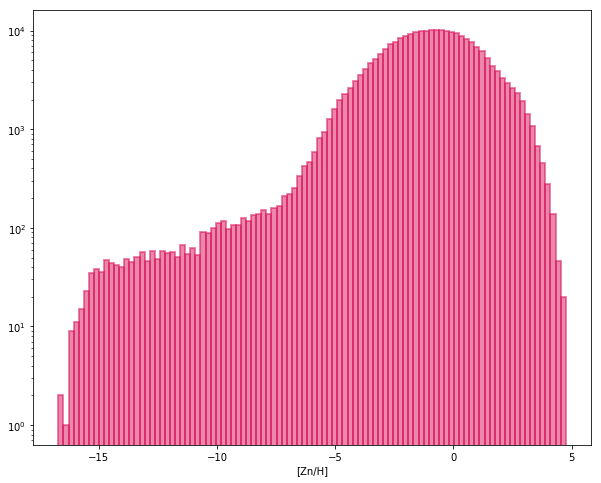

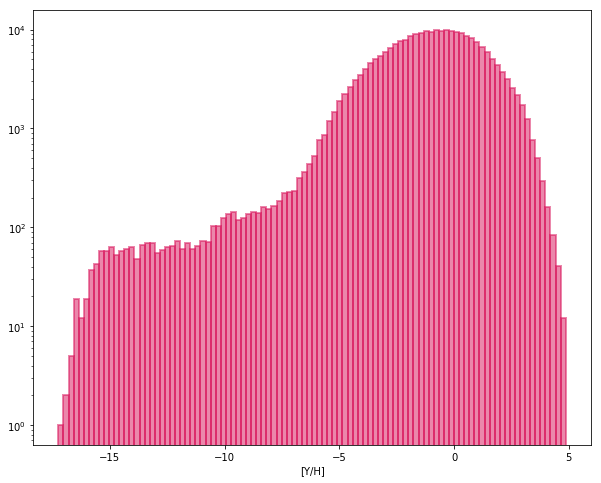

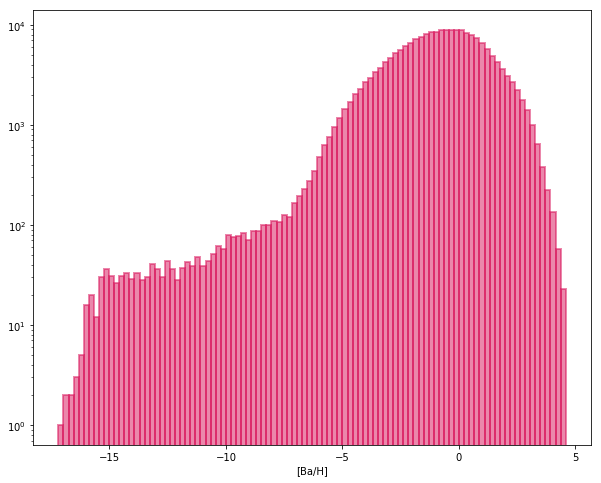

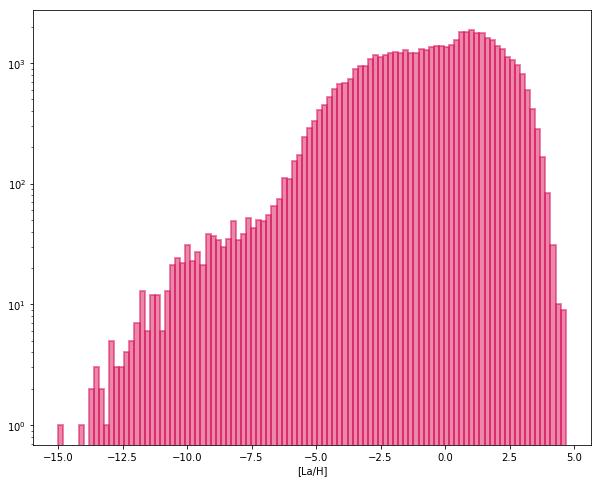

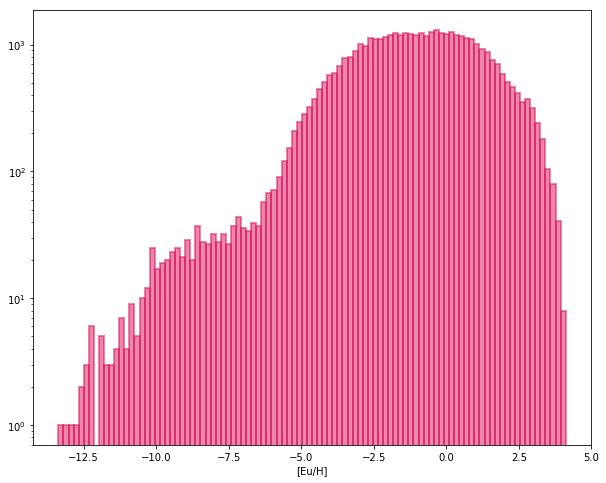

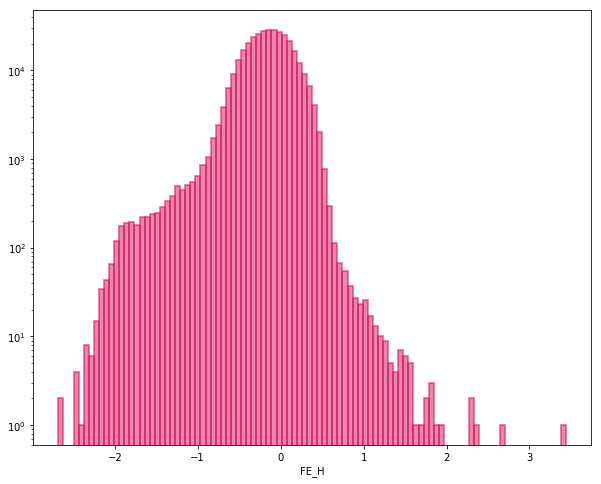

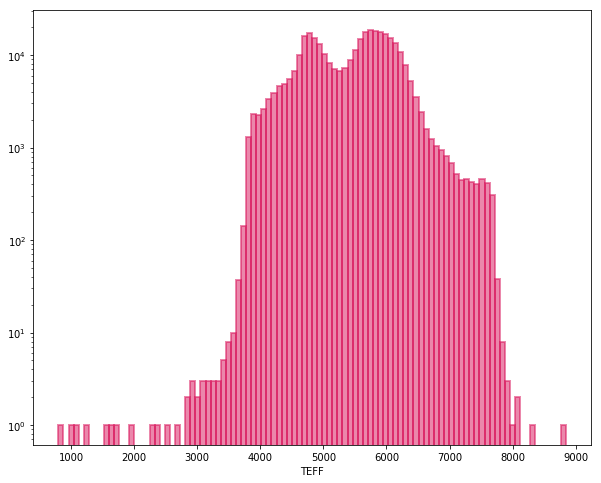

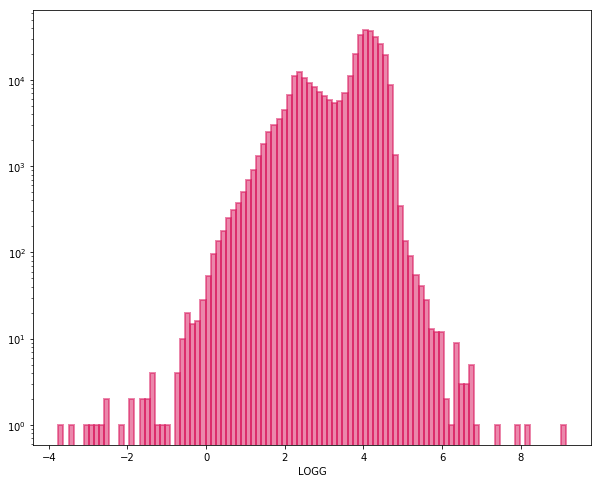

In [49]:
nbins=100
lw = 2
keys = ['li_fe','c_fe','o_fe','na_fe','mg_fe','al_fe','si_fe',
        'k_fe','ca_fe','sc_fe','ti_fe','v_fe','cr_fe','mn_fe',
        'co_fe','ni_fe','cu_fe','zn_fe','y_fe','ba_fe','la_fe',
        'eu_fe','fe_h','teff','logg']

elemkeys = ['li_fe','c_fe','o_fe','na_fe','mg_fe','al_fe','si_fe',
        'k_fe','ca_fe','sc_fe','ti_fe','v_fe','cr_fe','mn_fe',
        'co_fe','ni_fe','cu_fe','zn_fe','y_fe','ba_fe','la_fe',
        'eu_fe']

good = np.ones(len(galah_cat)).astype('bool')
for key in keys:
    plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    ax.set_yscale("log")
    histarr = galah_cat[key]
    if key in elemkeys:
        mask = np.where(np.invert(np.isnan(histarr)) & (galah_cat['flag_{0}'.format(key)] == 0))
        histarr+= galah_cat['fe_h']
        plt.xlabel('[{0}/H]'.format((key.split('_')[0]).capitalize()))
    elif key not in elemkeys:
        mask = np.where(np.invert(np.isnan(histarr)))
        plt.xlabel(key.upper())
    plt.hist(histarr[mask],nbins,fill=True,edgecolor='#D81159',color='#D81159',linewidth=lw,alpha=0.5)

## Open cluster files

In [2]:
import astropy.io.fits as afits

In [127]:
change_dr('14')

In [128]:
apogee_cat = apread.allStar(rmdups=True)

In [129]:
mem = afits.open('../occam/occam_member-DR14.fits')
mem = mem[1].data

In [130]:
goodmem = mem[mem['MEMBER_FLAG']=='GM']

In [134]:
newdata = np.zeros((len(goodmem),19))
spectra = np.zeros((len(goodmem),7514),dtype=float)
bitmask = np.zeros((len(goodmem),7514),dtype=np.int64)
suff = 'FE'
keys = ['STARFLAG',
        'TEFF','LOGG','FE_H',
        'C_{0}'.format(suff),
        'N_{0}'.format(suff),
        'O_{0}'.format(suff),
        'NA_{0}'.format(suff),
        'MG_{0}'.format(suff),
        'AL_{0}'.format(suff),
        'SI_{0}'.format(suff),
        'S_{0}'.format(suff),
        'K_{0}'.format(suff),
        'CA_{0}'.format(suff),
        'TI_{0}'.format(suff),
        'V_{0}'.format(suff),
        'MN_{0}'.format(suff),
        'NI_{0}'.format(suff)]
elems = ['C_{0}'.format(suff),
        'N_{0}'.format(suff),
        'O_{0}'.format(suff),
        'NA_{0}'.format(suff),
        'MG_{0}'.format(suff),
        'AL_{0}'.format(suff),
        'SI_{0}'.format(suff),
        'S_{0}'.format(suff),
        'K_{0}'.format(suff),
        'CA_{0}'.format(suff),
        'TI_{0}'.format(suff),
        'V_{0}'.format(suff),
        'MN_{0}'.format(suff),
        'NI_{0}'.format(suff)]
suff='H'
hkeys = ['STARFLAG',
        'TEFF','LOGG','FE_H',
        'C_{0}'.format(suff),
        'N_{0}'.format(suff),
        'O_{0}'.format(suff),
        'NA_{0}'.format(suff),
        'MG_{0}'.format(suff),
        'AL_{0}'.format(suff),
        'SI_{0}'.format(suff),
        'S_{0}'.format(suff),
        'K_{0}'.format(suff),
        'CA_{0}'.format(suff),
        'TI_{0}'.format(suff),
        'V_{0}'.format(suff),
        'MN_{0}'.format(suff),
        'NI_{0}'.format(suff)]
goodinds = []

for member in range(goodmem.shape[0]):
    try:
        match = np.where((apogee_cat['APOGEE_ID']).astype('U100')==goodmem['APOGEE_ID'][member])
        for k,key in enumerate(keys):
            newdata[:,k+1][member] = apogee_cat[key][match]
            if key in elems:
                newdata[:,k+1][member]+=apogee_cat['FE_H'][match]
        goodinds.append(member)
        LOC = apogee_cat['LOCATION_ID'][match][0]
        APO = (apogee_cat['APOGEE_ID'][match][0]).decode('UTF-8')
        spectra[member] = apread.aspcapStar(LOC,APO,dr='14',ext = 1, header = False, aspcapWavegrid=True)
        bitmask[member] = apread.aspcapStar(LOC,APO,dr='14',ext = 2, header = False, aspcapWavegrid=True)
    except ValueError as e:
        print(e)
        pass
    except IndexError as e:
        print(e)
        pass
    except OSError as e:
        print(e)
        pass
formatstr = 'U100, '+', '.join(['f4']*18)
newdata = np.core.records.fromarrays((newdata[goodinds]).transpose(), 
                                     names='CLUSTER, '+', '.join(hkeys),
                                     formats = formatstr)
newdata['CLUSTER'] = goodmem['CLUSTER'][goodinds]
spectra = spectra[goodinds]
bitmask = bitmask[goodinds]
data = newdata

setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a sequence.
setting an array element with a se

In [161]:
good = np.where((data['STARFLAG']==0) & (data['C_{0}'.format(suff)] > -1000) & (data['N_{0}'.format(suff)] > -1000) & (data['O_{0}'.format(suff)] > -1000) & (data['NA_{0}'.format(suff)] > -1000) & (data['MG_{0}'.format(suff)] > -1000) & (data['AL_{0}'.format(suff)] > -1000) & (data['SI_{0}'.format(suff)] > -1000) & (data['S_{0}'.format(suff)] > -1000) & (data['K_{0}'.format(suff)] > -1000) & (data['CA_{0}'.format(suff)] > -1000) & (data['TI_{0}'.format(suff)] > -1000) & (data['V_{0}'.format(suff)] > -1000) & (data['MN_{0}'.format(suff)] > -1000) & (data['FE_H'] > -1000) & (data['NI_{0}'.format(suff)] > -1000) & (data['TEFF'] > -1000) & (data['TEFF']<5000) & (data['LOGG'] > -1000))
teffcut = np.where((data[good]['TEFF'] > 4700) & (data[good]['TEFF'] < 4900))

In [165]:
clusters = np.unique(newdata['CLUSTER'])
sizes = np.zeros(clusters.shape)
for c,cls in enumerate(clusters):
    members = newdata['CLUSTER'][good]==cls
    sizes[c] = np.sum(members)
    print('{0}{1}{2}'.format(cls,''.join([' ']*(15-len(cls))),int(sizes[c])))

Berkeley 17    6
Berkeley 53    1
Berkeley 66    0
Berkeley 71    0
FSR 0494       0
IC 166         0
King 5         0
King 7         0
NGC 1245       1
NGC 1798       3
NGC 188        7
NGC 2158       0
NGC 2420       6
NGC 2682       11
NGC 6791       0
NGC 6811       1
NGC 6819       17
NGC 7789       11
Teutsch 51     0


In [ ]:
clusters = np.unique(data[good]['CLUSTER'] )
sizes = np.zeros(clusters.shape)
for c,cls in enumerate(clusters):
    members = data['CLUSTER'][good]==cls
    sizes[c] = np.sum(members)
    print('{0}{1}{2}'.format(cls,''.join([' ']*(15-len(cls))),int(sizes[c])))

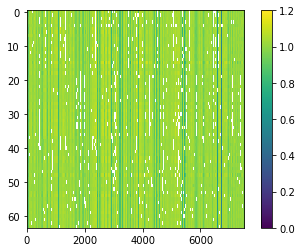

In [140]:
specs = np.ma.masked_array(spectra[good],mask=bitmask[good]!=0)
plt.imshow(specs,aspect=specs.shape[1]/float(specs.shape[0]),vmin=0,vmax=1.2)
plt.colorbar()

In [141]:
newspecs = np.zeros(specs.shape)
for s,spec in enumerate(specs):
    unmasked = np.invert(spec.mask)
    interp = interp1d(np.arange(7514)[unmasked],spec[unmasked],kind='slinear',fill_value='extrapolate')
    newspecs[s] = interp(np.arange(7514))
tffspecs = np.zeros(specs.shape)
for s,spec in enumerate(specs.T):
    unmasked = np.invert(spec.mask)
    interp = interp1d(data['TEFF'][good][unmasked],spec[unmasked],kind='slinear',fill_value='extrapolate')
    tffspecs[:,s] = interp(data['TEFF'][good])
lggspecs = np.zeros(specs.shape)
for s,spec in enumerate(specs.T):
    unmasked = np.invert(spec.mask)
    interp = interp1d(data['LOGG'][good][unmasked],spec[unmasked],kind='slinear',fill_value='extrapolate')
    lggspecs[:,s] = interp(data['LOGG'][good])
fehspecs = np.zeros(specs.shape)
for s,spec in enumerate(specs.T):
    unmasked = np.invert(spec.mask)
    interp = interp1d(data['FE_H'][good][unmasked],spec[unmasked],kind='slinear',fill_value='extrapolate')
    fehspecs[:,s] = interp(data['FE_H'][good])
interps = [newspecs,tffspecs,lggspecs,fehspecs]
names = ['pixel','teff','logg','fe_h']
from matplotlib.colors import SymLogNorm
plt.figure(figsize=(25,20))
for i1,intp1 in enumerate(interps):
    plotind = i1+1
    for i2,intp2 in enumerate(interps):
        if i2 >= i1:
            plt.subplot(len(interps),len(interps),plotind)
            if i1 != i2:
                plt.imshow(intp1-intp2,aspect=intp1.shape[1]/float(intp1.shape[0]),cmap='bwr',norm=SymLogNorm(linthresh=1e-3, linscale=1e-3,vmin=-0.15, vmax=0.15))
                plt.colorbar(label='{0}-{1}'.format(names[i1],names[i2]))
            elif i1 == i2:
                plt.imshow(intp1,aspect=intp1.shape[1]/float(intp1.shape[0]),cmap='viridis',vmin=0,vmax=1.2)
                plt.colorbar(label=names[i1])
        plotind+=len(interps)        

In [146]:
from apogee.tools import toApStarGrid, toAspcapGrid
savespec = np.zeros((specs.shape[0],7214))
for s,spec in enumerate(tffspecs):
    conv = toApStarGrid(spec,dr='14')
    savespec[s] = toAspcapGrid(conv,dr='12')

In [147]:
np.save('clustercases/occam_chemscrub_dr14.npy', data[good])
np.save('clustercases/occam_chemscrub_dr14_interpspec.npy',savespec)

In [191]:
import astropy
data= astropy.io.ascii.read('clustercases/aj485195t4_mrt.txt')

In [192]:
data

2MASS,Cluster,RVel,Teff,TeffC,logg,loggC,[M/H],[M/H]C,[C/M],[N/M],[a/M],S/N,Jmag,Hmag,Kmag,e_TeffC,e_[M/H]C
,,km / s,K,K,[cm/s2],[cm/s2],[-],[-],[-],[-],[-],,mag,mag,mag,K,[-]
str18,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2M17162228+4258036,M92,-118.06,5067.8,4995.2,2.56,2.08,-1.94,-2.2,0.58,0.9,0.04,163.1,12.826,12.267,12.247,171.3,0.134
2M17163427+4307363,M92,-119.6,4776.2,4819.3,1.85,1.35,-2.13,-2.32,0.19,0.78,0.15,142.6,11.948,11.407,11.34,176.3,0.139
2M17163577+4256392,M92,-117.42,5200.8,5075.4,2.87,2.4,-1.92,-2.21,0.83,0.94,0.06,125.0,13.171,12.675,12.612,171.7,0.135
2M17164330+4304161,M92,-121.02,5200.6,5075.3,2.91,2.43,-1.95,-2.24,0.86,0.95,0.13,132.2,13.091,12.618,12.504,172.9,0.136
2M17165035+4305531,M92,-117.37,4948.4,4923.2,2.14,1.65,-2.11,-2.34,0.44,0.91,0.17,160.0,12.446,11.969,11.908,176.9,0.139
2M17165118+4306434,M92,-115.37,4985.5,4945.6,2.41,1.92,-2.0,-2.25,0.38,0.89,0.11,138.4,12.44,11.951,11.843,173.2,0.136
2M17165185+4308031,M92,-117.37,4943.4,4920.2,2.42,1.93,-1.98,-2.21,0.26,0.92,0.07,150.8,12.511,11.974,11.917,171.9,0.135
2M17165519+4301588,M92,-124.31,5188.6,5068.1,2.86,2.38,-1.96,-2.24,0.77,0.92,0.16,143.7,13.066,12.549,12.515,172.9,0.136


In [193]:
clusters = np.unique(data['Cluster'])

In [194]:
sizes = np.zeros(clusters.shape)
for c,cls in enumerate(clusters):
    members = data['Cluster']==cls
    sizes[c] = np.sum(members)
    print('{0}{1}{2}'.format(cls,''.join([' ']*(15-len(cls))),int(sizes[c])))

M107           18
M13            71
M15            11
M2             19
M3             73
M35            1
M5             103
M53            16
M67            24
M71            7
M92            48
N188           5
N2158          10
N2420          9
N4147          3
N5466          8
N6791          23
N6819          30
N7789          5
Pleiades       75


In [195]:
newdata = np.zeros((len(data),19))
spectra = np.zeros((len(data),7514),dtype=float)
bitmask = np.zeros((len(data),7514),dtype=np.int64)
suff = 'FE'
keys = ['STARFLAG',
        'TEFF','LOGG','FE_H',
        'C_{0}'.format(suff),
        'N_{0}'.format(suff),
        'O_{0}'.format(suff),
        'NA_{0}'.format(suff),
        'MG_{0}'.format(suff),
        'AL_{0}'.format(suff),
        'SI_{0}'.format(suff),
        'S_{0}'.format(suff),
        'K_{0}'.format(suff),
        'CA_{0}'.format(suff),
        'TI_{0}'.format(suff),
        'V_{0}'.format(suff),
        'MN_{0}'.format(suff),
        'NI_{0}'.format(suff)]
elems = ['C_{0}'.format(suff),
        'N_{0}'.format(suff),
        'O_{0}'.format(suff),
        'NA_{0}'.format(suff),
        'MG_{0}'.format(suff),
        'AL_{0}'.format(suff),
        'SI_{0}'.format(suff),
        'S_{0}'.format(suff),
        'K_{0}'.format(suff),
        'CA_{0}'.format(suff),
        'TI_{0}'.format(suff),
        'V_{0}'.format(suff),
        'MN_{0}'.format(suff),
        'NI_{0}'.format(suff)]
suff='H'
hkeys = ['STARFLAG',
        'TEFF','LOGG','FE_H',
        'C_{0}'.format(suff),
        'N_{0}'.format(suff),
        'O_{0}'.format(suff),
        'NA_{0}'.format(suff),
        'MG_{0}'.format(suff),
        'AL_{0}'.format(suff),
        'SI_{0}'.format(suff),
        'S_{0}'.format(suff),
        'K_{0}'.format(suff),
        'CA_{0}'.format(suff),
        'TI_{0}'.format(suff),
        'V_{0}'.format(suff),
        'MN_{0}'.format(suff),
        'NI_{0}'.format(suff)]
goodinds = []

for member in range(len(data)):
    try:
        match = np.where((apogee_cat['APOGEE_ID']).astype('U100')==data['2MASS'][member])
        for k,key in enumerate(keys):
            newdata[:,k+1][member] = apogee_cat[key][match]
            if key in elems:
                newdata[:,k+1][member]+=apogee_cat['FE_H'][match]
        goodinds.append(member)
        LOC = apogee_cat['LOCATION_ID'][match][0]
        APO = (apogee_cat['APOGEE_ID'][match][0]).decode('UTF-8')
        spectra[member] = apread.aspcapStar(LOC,APO,dr='14',ext = 1, header = False, aspcapWavegrid=True)
        bitmask[member] = apread.aspcapStar(LOC,APO,dr='14',ext = 2, header = False, aspcapWavegrid=True)
    except ValueError as e:
        print(e)
        pass
    except IndexError as e:
        print(e)
        pass
    except OSError as e:
        print(e)
        pass
formatstr = 'U100, '+', '.join(['f4']*18)
newdata = np.core.records.fromarrays((newdata[goodinds]).transpose(), 
                                     names='CLUSTER, '+', '.join(hkeys),
                                     formats = formatstr)
newdata['CLUSTER'] = data['Cluster'][goodinds]
spectra = spectra[goodinds]
bitmask = bitmask[goodinds]
data = newdata

(array([], dtype=int64),)
setting an array element with a sequence.
(array([164205]),)
(array([164213]),)
(array([164253]),)
(array([164303]),)
(array([164309]),)
(array([], dtype=int64),)
setting an array element with a sequence.
(array([164350]),)
(array([164351]),)
(array([164358]),)
(array([164382]),)
(array([], dtype=int64),)
setting an array element with a sequence.
(array([164387]),)
(array([164388]),)
(array([164392]),)
(array([164400]),)
(array([], dtype=int64),)
setting an array element with a sequence.
(array([164413]),)
(array([], dtype=int64),)
setting an array element with a sequence.
(array([164443]),)
(array([], dtype=int64),)
setting an array element with a sequence.
(array([164473]),)
(array([164481]),)
(array([164512]),)
(array([164513]),)
(array([164533]),)
(array([], dtype=int64),)
setting an array element with a sequence.
(array([164546]),)
(array([164564]),)
(array([164565]),)
(array([164566]),)
(array([164573]),)
(array([164575]),)
(array([164582]),)
(array([164

In [207]:
good = np.where((data['STARFLAG']==0) & (data['C_{0}'.format(suff)] > -1000) & (data['N_{0}'.format(suff)] > -1000) & (data['O_{0}'.format(suff)] > -1000) & (data['NA_{0}'.format(suff)] > -1000) & (data['MG_{0}'.format(suff)] > -1000) & (data['AL_{0}'.format(suff)] > -1000) & (data['SI_{0}'.format(suff)] > -1000) & (data['S_{0}'.format(suff)] > -1000) & (data['K_{0}'.format(suff)] > -1000) & (data['CA_{0}'.format(suff)] > -1000) & (data['TI_{0}'.format(suff)] > -1000) & (data['V_{0}'.format(suff)] > -1000) & (data['MN_{0}'.format(suff)] > -1000) & (data['FE_H'] > -1000) & (data['NI_{0}'.format(suff)] > -1000) & (data['TEFF'] > -1000) & (data['TEFF']<5000) & (data['LOGG'] > -1000))
#good = np.where((data['STARFLAG']==0))
teffcut = np.where((data[good]['TEFF'] > 4700) & (data[good]['TEFF'] < 4900))

In [208]:
clusters = np.unique(newdata['CLUSTER'])
sizes = np.zeros(clusters.shape)
for c,cls in enumerate(clusters):
    members = newdata['CLUSTER']==cls
    sizes[c] = np.sum(members)
    print('{0}{1}{2}'.format(cls,''.join([' ']*(15-len(cls))),int(sizes[c])))

M107           13
M13            38
M15            6
M2             12
M3             58
M5             75
M53            16
M67            19
M71            6
M92            38
N188           5
N2158          7
N2420          9
N4147          1
N5466          7
N6791          19
N6819          21
N7789          4
Pleiades       15


In [209]:
clusters = np.unique(data['CLUSTER'][good] )
sizes = np.zeros(clusters.shape)
for c,cls in enumerate(clusters):
    members = data['CLUSTER'][good]==cls
    sizes[c] = np.sum(members)
    print('{0}{1}{2}'.format(cls,''.join([' ']*(15-len(cls))),int(sizes[c])))

M107           2
M2             1
M67            9
N188           2
N2420          5
N6819          13
N7789          1


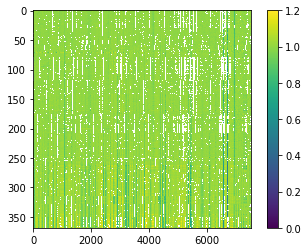

In [210]:
specs = np.ma.masked_array(spectra,mask=bitmask!=0)
plt.imshow(specs,aspect=specs.shape[1]/float(specs.shape[0]),vmin=0,vmax=1.2)
plt.colorbar()

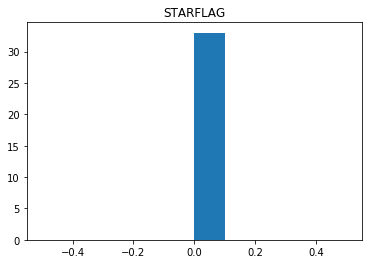

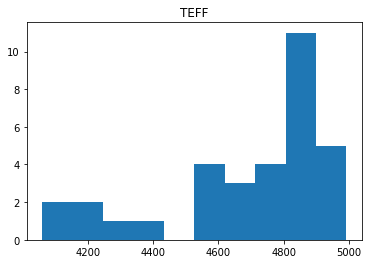

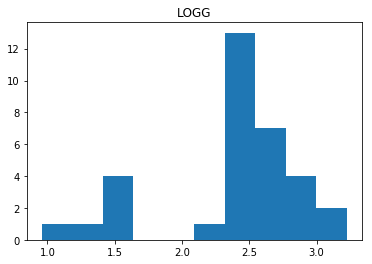

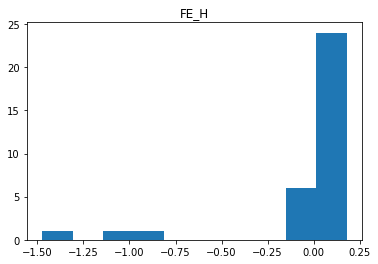

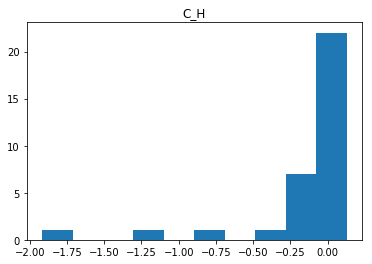

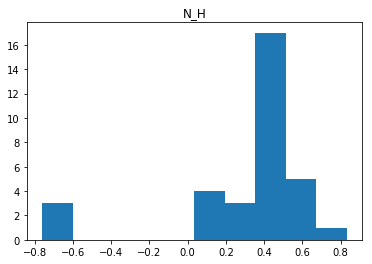

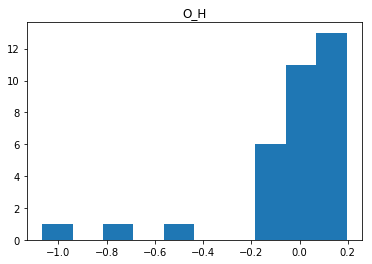

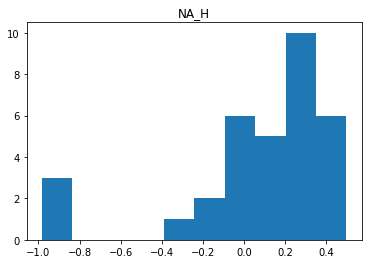

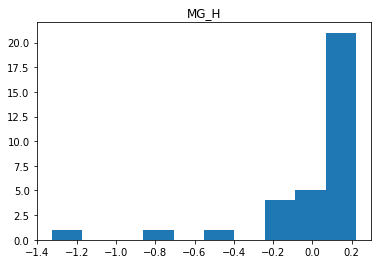

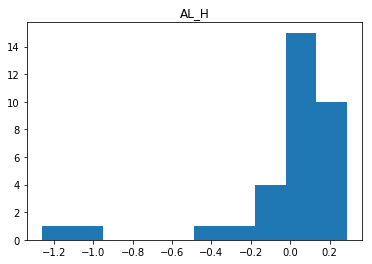

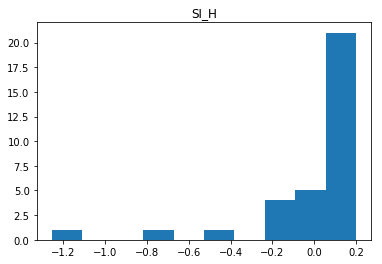

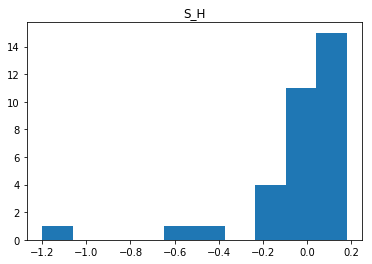

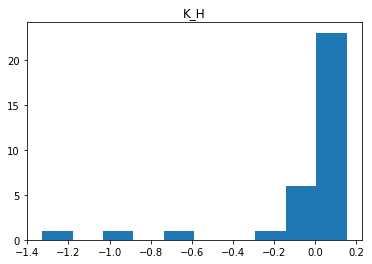

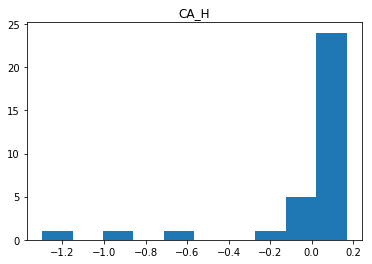

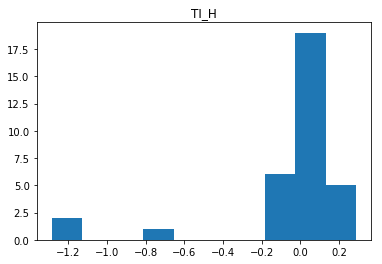

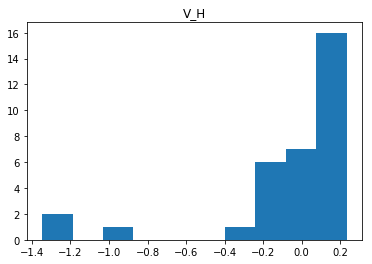

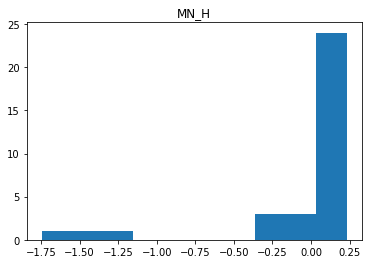

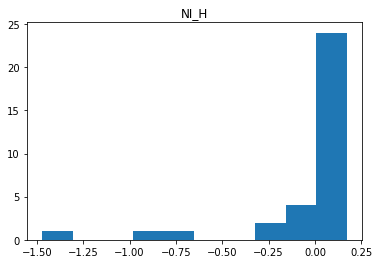

In [211]:
for key in hkeys:
    plt.figure()
    plt.title(key)
    plt.hist(data[good][key])

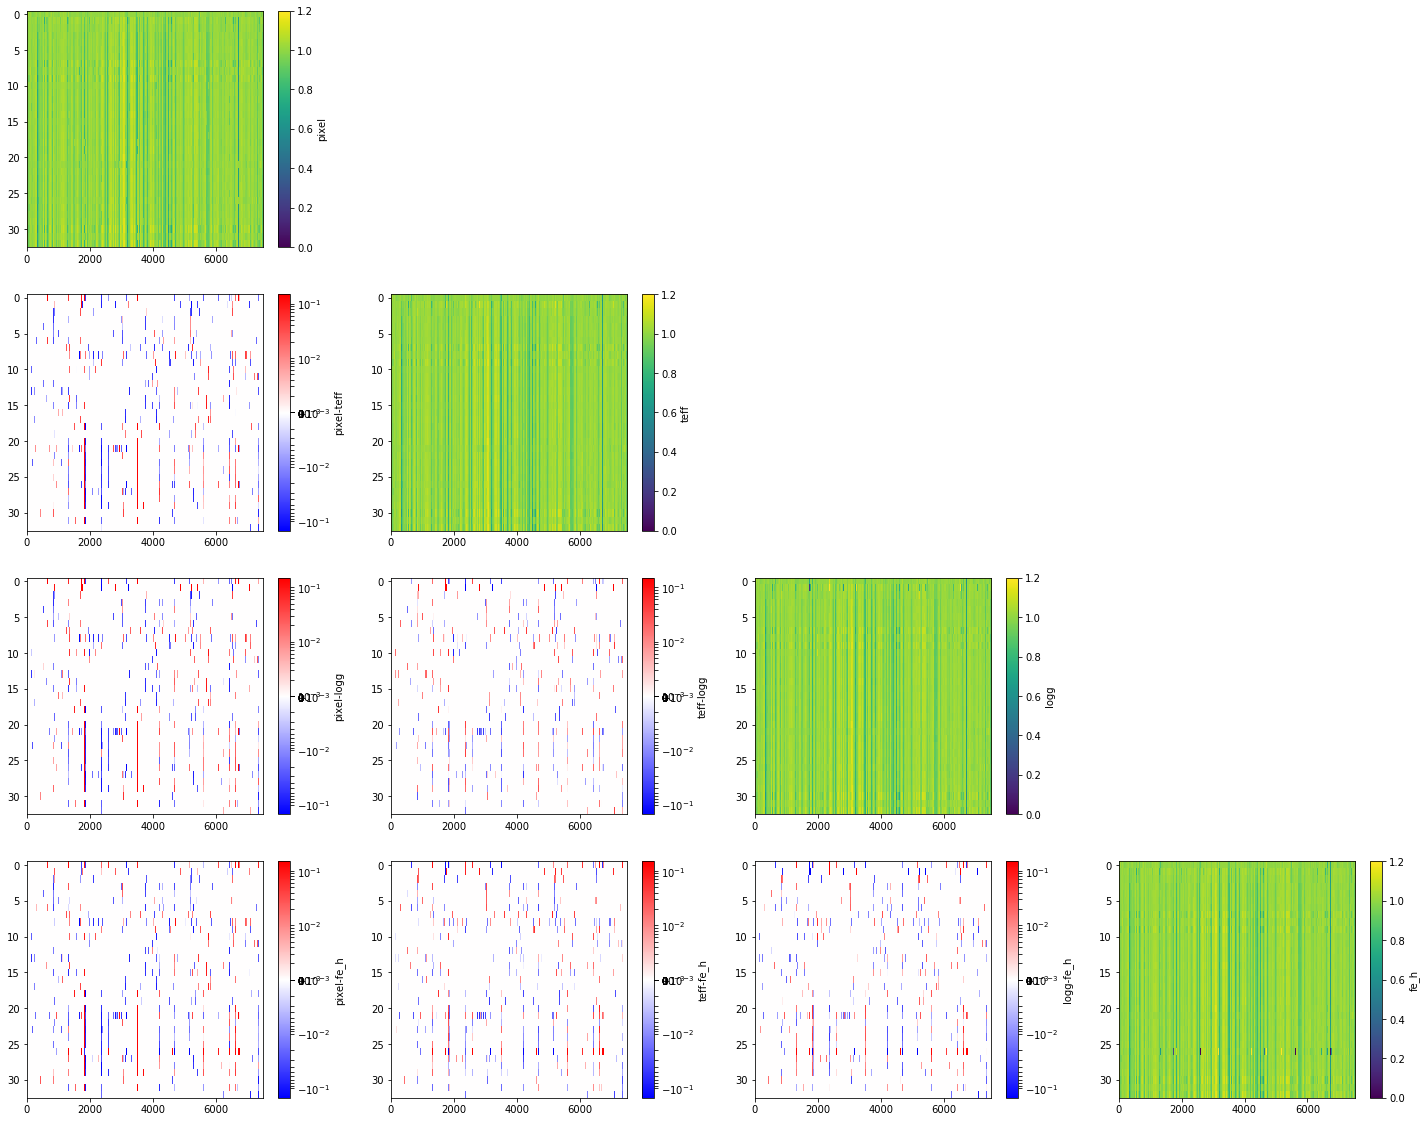

In [188]:
newspecs = np.zeros(specs.shape)
for s,spec in enumerate(specs):
    unmasked = np.invert(spec.mask)
    interp = interp1d(np.arange(7514)[unmasked],spec[unmasked],kind='slinear',fill_value='extrapolate')
    newspecs[s] = interp(np.arange(7514))
tffspecs = np.zeros(specs.shape)
for s,spec in enumerate(specs.T):
    unmasked = np.invert(spec.mask)
    interp = interp1d(data['TEFF'][good][unmasked],spec[unmasked],kind='slinear',fill_value='extrapolate')
    tffspecs[:,s] = interp(data['TEFF'][good])
lggspecs = np.zeros(specs.shape)
for s,spec in enumerate(specs.T):
    unmasked = np.invert(spec.mask)
    interp = interp1d(data['LOGG'][good][unmasked],spec[unmasked],kind='slinear',fill_value='extrapolate')
    lggspecs[:,s] = interp(data['LOGG'][good])
fehspecs = np.zeros(specs.shape)
for s,spec in enumerate(specs.T):
    unmasked = np.invert(spec.mask)
    interp = interp1d(data['FE_H'][good][unmasked],spec[unmasked],kind='slinear',fill_value='extrapolate')
    fehspecs[:,s] = interp(data['FE_H'][good])
interps = [newspecs,tffspecs,lggspecs,fehspecs]
names = ['pixel','teff','logg','fe_h']
from matplotlib.colors import SymLogNorm
plt.figure(figsize=(25,20))
for i1,intp1 in enumerate(interps):
    plotind = i1+1
    for i2,intp2 in enumerate(interps):
        if i2 >= i1:
            plt.subplot(len(interps),len(interps),plotind)
            if i1 != i2:
                plt.imshow(intp1-intp2,aspect=intp1.shape[1]/float(intp1.shape[0]),cmap='bwr',norm=SymLogNorm(linthresh=1e-3, linscale=1e-3,vmin=-0.15, vmax=0.15))
                plt.colorbar(label='{0}-{1}'.format(names[i1],names[i2]))
            elif i1 == i2:
                plt.imshow(intp1,aspect=intp1.shape[1]/float(intp1.shape[0]),cmap='viridis',vmin=0,vmax=1.2)
                plt.colorbar(label=names[i1])
        plotind+=len(interps)        

In [189]:
from apogee.tools import toApStarGrid, toAspcapGrid
savespec = np.zeros((specs.shape[0],7214))
for s,spec in enumerate(tffspecs):
    conv = toApStarGrid(spec,dr='14')
    savespec[s] = toAspcapGrid(conv,dr='12')

In [190]:
np.save('clustercases/meszaros_chemscrub_dr14.npy', data[good])
np.save('clustercases/meszaros_chemscrub_dr14_interpspec.npy',savespec)